In [3]:
import scanpy as sc
from matplotlib import rc_context

In [4]:
sc.set_figure_params(dpi=100, color_map="viridis_r")
sc.settings.verbosity = 0
sc.logging.print_header()

/var/folders/m5/z71192pd5msbtxhv764jq3_h0000gn/T/ipykernel_54631/1273699339.py:3: RuntimeWarning: Failed to import dependencies for application/vnd.jupyter.widget-view+json representation. (ModuleNotFoundError: No module named 'ipywidgets')
  sc.logging.print_header()


scanpy	1.11.4
matplotlib	3.10.5
----	----
anndata	0.12.2
packaging	25.0
traitlets	5.14.3
igraph	0.11.9
tornado	6.5.2
ipython	9.5.0
psutil	7.0.0
six	1.17.0
platformdirs	4.4.0
python-dateutil	2.9.0.post0
scikit-learn	1.7.2
scipy	1.16.1
numcodecs	0.16.1
numexpr	2.10.2
asttokens	3.0.0
texttable	1.7.0
session-info2	0.2.1
jupyter_core	5.8.1
debugpy	1.8.16
jupyter_client	8.6.3
kiwisolver	1.4.9
Cython	3.1.3
cycler	0.12.1
appnope	0.1.4
wcwidth	0.2.13
Pygments	2.19.2
matplotlib-inline	0.1.7
legacy-api-wrap	1.4.1
msgpack	1.1.1
leidenalg	0.10.2
colorama	0.4.6
ipykernel	6.30.1
joblib	1.5.2
decorator	5.2.1
pytz	2025.2
crc32c	2.7.1
parso	0.8.5
llvmlite	0.44.0
jedi	0.19.2
setuptools	80.9.0
comm	0.2.3
prompt_toolkit	3.0.52
pyzmq	27.0.2
donfig	0.8.1.post1
pillow	11.3.0
pandas	2.3.2
PyYAML	6.0.2
numpy	2.2.6
threadpoolctl	3.6.0
h5py	3.13.0
typing_extensions	4.15.0
executing	2.2.0
pure_eval	0.2.3
stack_data	0.6.3
natsort	8.4.0
charset-normalizer	3.4.3
zarr	3.1.2
pyparsing	3.2.3
numba	0.61.2
----	----
Python	3.13.5 | packaged by conda-forge | (main, Jun 16 2025, 08:24:05) [Clang 18.1.8 ]
OS	macOS-14.6.1-arm64-arm-64bit-Mach-O
CPU	8 logical CPU cores, arm
GPU	No GPU found
Updated	2025-09-17 07:35

### Load pbmc dataset

In [5]:
pbmc = sc.datasets.pbmc68k_reduced()

In [6]:
# inspect pbmc contents
pbmc

AnnData object with n_obs × n_vars = 700 × 765
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

### Visualization of gene expresion and other variables

scatter plot (산점도)의 경우, color 매개변수에 플롯하려는 값을 지정함.

이 값은 특정 유전자 이름이 될 수도 있고, **obs** 에 있는 모든 열 (column)이 될 수도 있다.
- .obs 는 각 세포 (observation)에 대한 주석 정보가 담긴 DataFrame(데이터 프레임), anndata 라이브러리 에서 사용하는 핵심 데이터 구조이다.

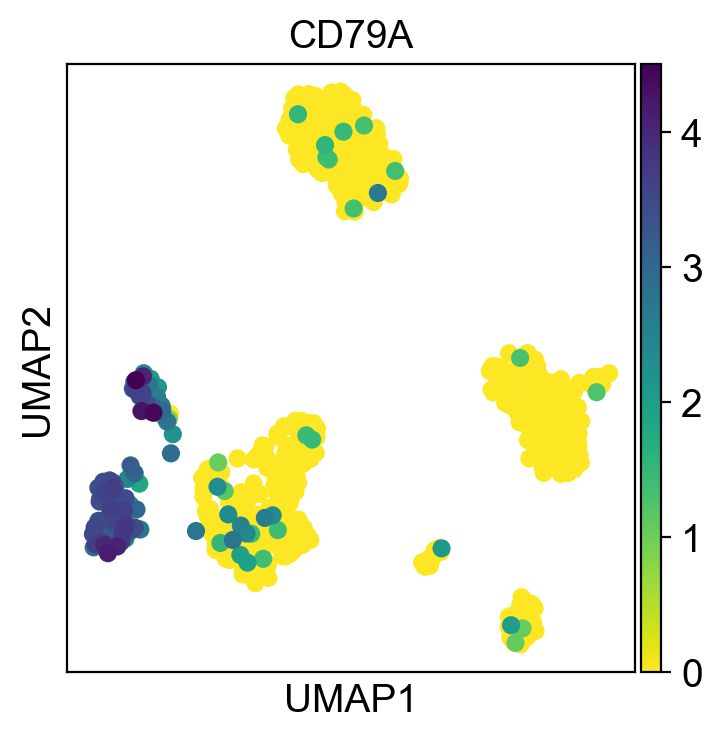

In [7]:
# rc_context is used for the figure size, in this case 4x4

with rc_context({'figure.figsize': (4,4)}):
    sc.pl.umap(pbmc, color="CD79A")

## 다중 값 플롯 그리기
이 예시에서는 'CD79A', 'MS4A1', 'IGJ', 'CD3D', 'FCER1A', 'FCGR3A' 여섯 가지 유전자의 발현 위치를 확인하기 위해 여러 값을 함께 플로팅한다.

1. n_counts : 각 세포별 UMI (Unique Molecular Identifier)카운트 수로, **.obs** 에 저장된 값이다.
2. bulk_labels : 10X Genomics에서 제공하는 원래 세포 라벨 (범주형 값)이다.

### 플롯 설정 상세 설명
- **ncols** : 한 행에 표시될 플롯의 개수를 설정함.
- **vmax** : 플롯에 표시될 최대값을 조절함.

Example
**vmax**를 **p99**로 설정했는데, 이는 뎅디터의 99번째 백분위수 (percentile)를 최대값으로 사용한다는 의미
(이렇게 하면 극단적 이상치 (outlier)가 색상 스케일을 왜곡하는 것을 방지할 수 있어 데이터의전반적인 분포를 더 잘 파악할 수 있다. **vmin**은 최소값을 설정하는데 사용됨.)

**frameon=False** 플롯 주변의 테두리 (박스)를 제거

**s=50** 점(dot)의 크기를 50으로 설정함.

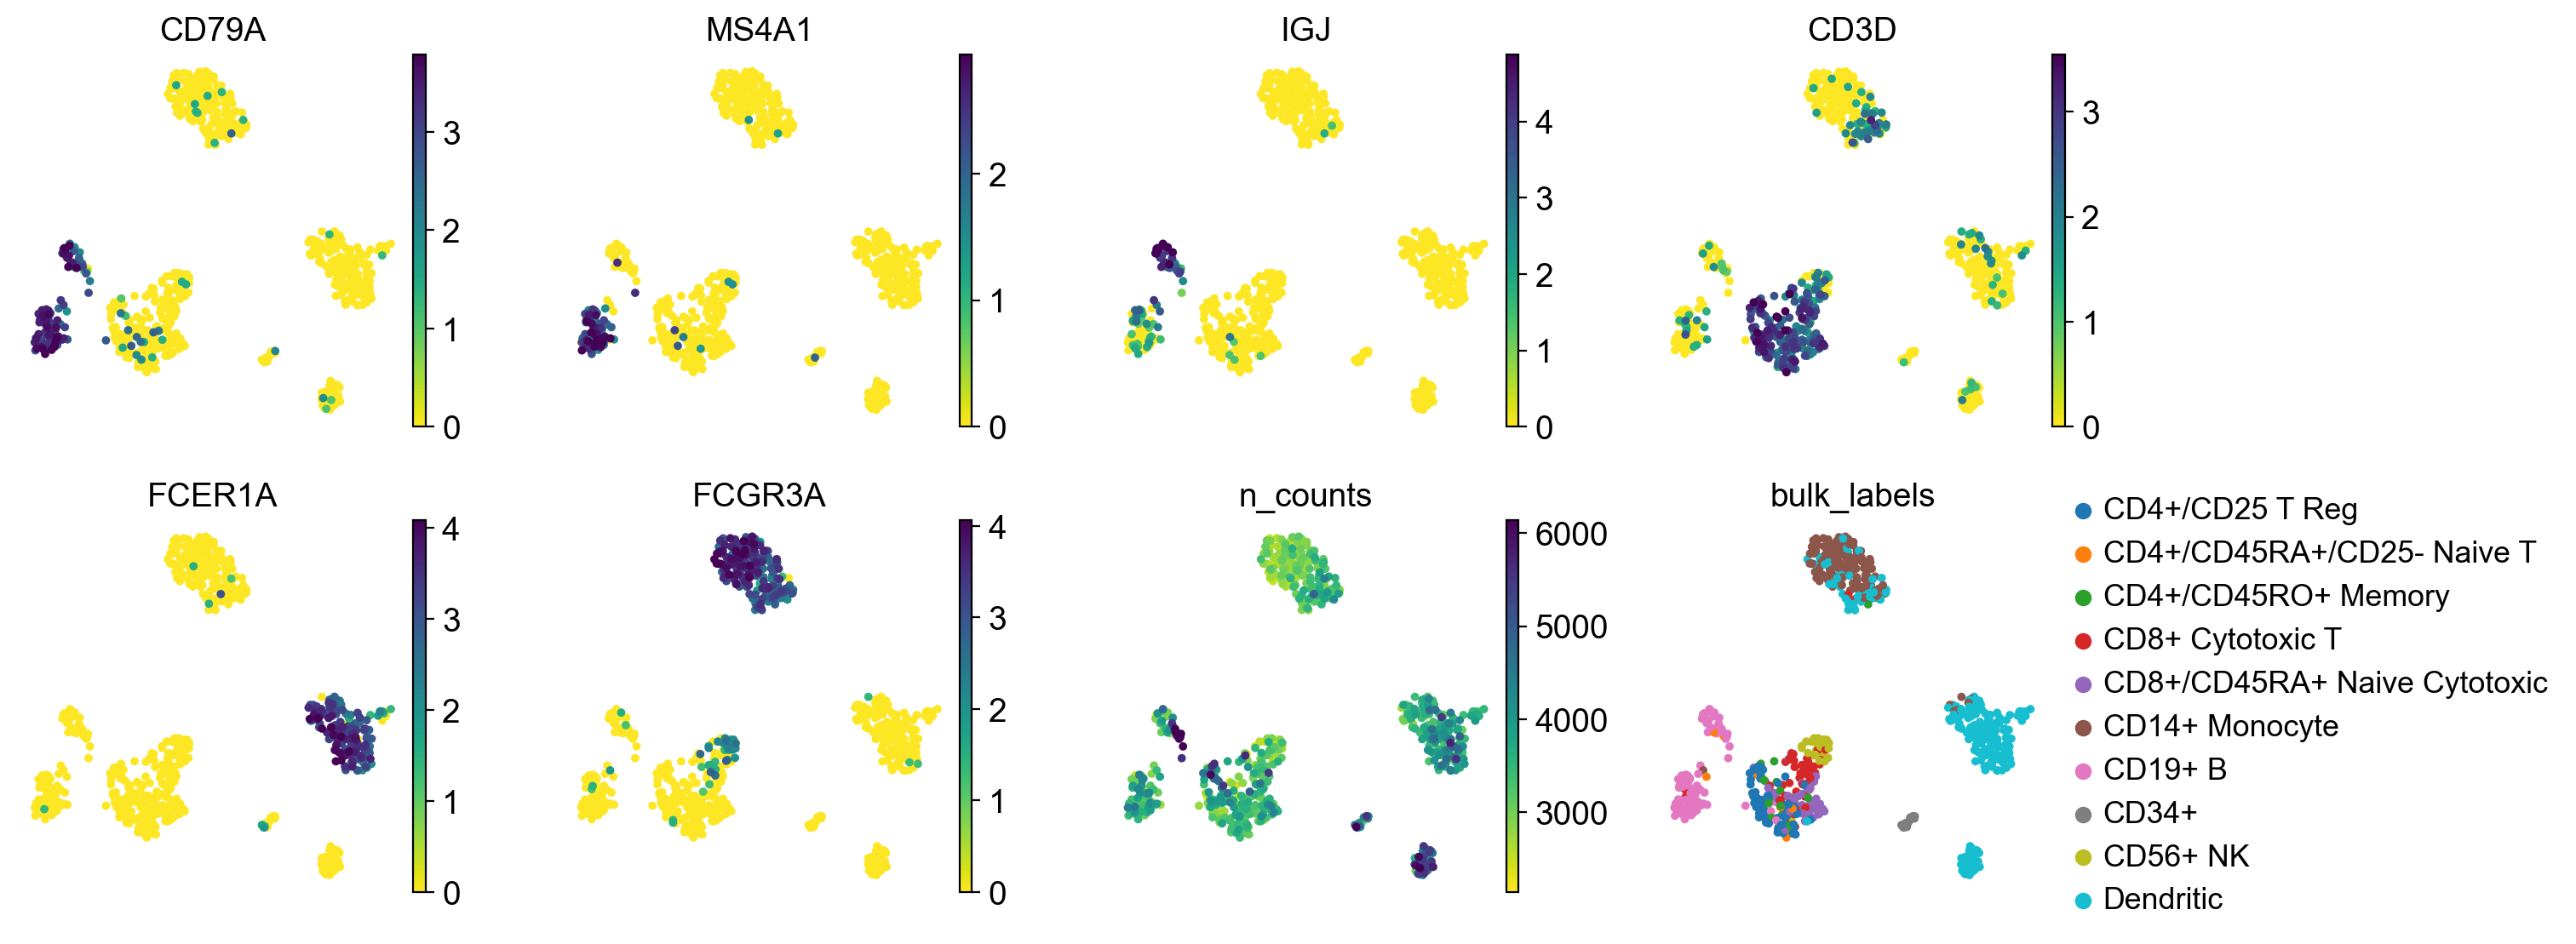

In [8]:
color_vars = [
    "CD79A",
    "MS4A1",
    "IGJ",
    "CD3D",
    "FCER1A",
    "FCGR3A",
    "n_counts",
    "bulk_labels",
]
with rc_context({"figure.figsize": (3, 3)}):
    sc.pl.umap(pbmc, color=color_vars, s=50, frameon=False, ncols=4, vmax="p99")

이 플롯에서 우리는 마커 유전자 (marker genes)를 발현하는 세포들의 그룹과 원래의 세포 라벨이 얼마나 일치하는지를 확인할 수 있다.

산점도 (scatterplot)를 그리는 함수에는 이미지를 세밀하게 조정할 수 있는 다양한 옵션이 있습니다.

ex) 다음과 같이 클러스터링을 살펴볼 수 있다.

In [11]:
sc.tl.leiden(
    pbmc,
    key_added="clusters",
    resolution=0.5,
    n_iterations=2,
    flavor="igraph",
    directed=False,
)

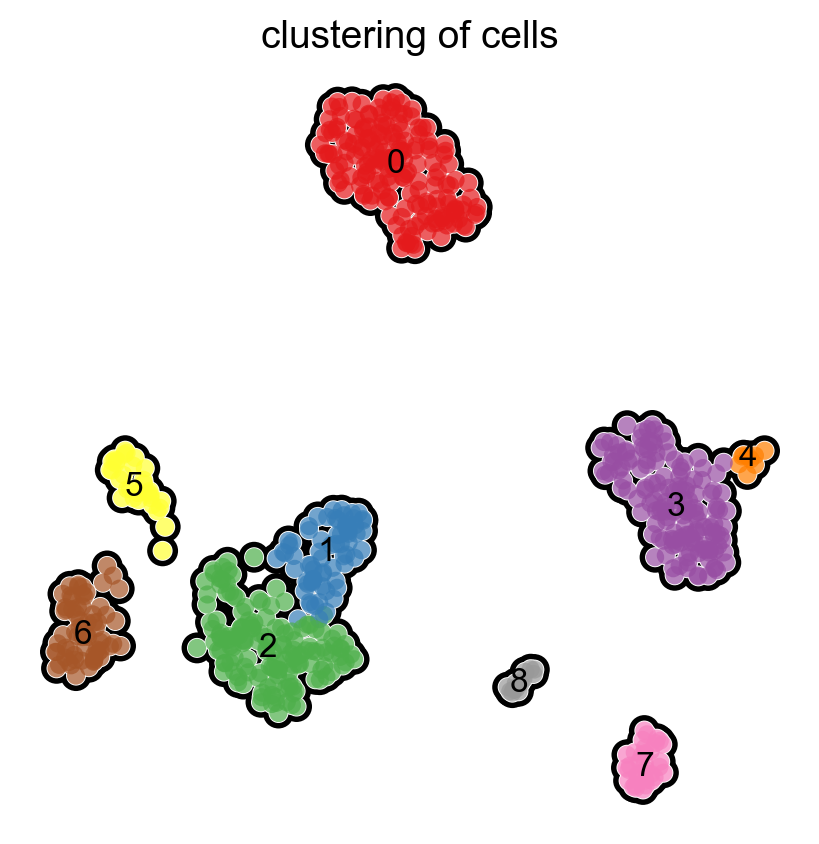

In [12]:
with rc_context({"figure.figsize": (5, 5)}):
    sc.pl.umap(
        pbmc,
        color="clusters",
        add_outline=True,
        legend_loc="on data",
        legend_fontsize=12,
        legend_fontweight=2,
        frameon=False,
        title="clustering of cells",
        palette="Set1",
    )

### Identification of clusters based on known marker genes

### 마커 유전자를 이용한 클러스터 식별
데이터 분석에서 클러스터(cluster)는 종종 잘 알려진 마커 유전자(marker genes)를 사용하여 이름을 붙일 필요가 있다.

마커 유전자는 특정 세포 유형에서만 높게 발현되는 유전자이므로, 이를 통해 클러스터가 어떤 종류의 세포 집단인지를 추론할 수 있다.
- 산점도 **(scatter plot)** : 산점도를 통해 특정 유전자의 발현 패턴을 확인하고 이를 클러스터와 연결 지어 볼 수 있다.

### 클러스터와 유전자의 관계 시각화
텍스트는 산점도 외에 클러스터와 마커 유전자의 관계를 시각적으로 보여주는 다른 방법들을 소개한다.
이 시각화 방법들은 모두 **클러스터별로 유전자 발현량을 요약하여 보여준다**는 공통점을 가지고 있다.
방법에 따라서 선택하는건 연구자가 결정해야한다.

1. **dotplots** : 점의 크기와 색상으로 유전자 발현량과 발현 비율을 동시에 표현함.
2. **violine plots** : 각 클러스터 내에서 유전자 발현량의 분포를 바이올린 모양으로 보여준다.
3. **heatmaps** : 클러스터와 유전자를 행과 열로 배치, 발현량을 색상 강도를 표현함.
4. **tracksplot** : '트랙' 형태로 유전자 발현 패턴을 시각화하는 방법으로, 텍스트에서 '우리가 부르는'(we call) 표현을 사용한 것으로 보아 특정 라이브러리(Scanpy)에서 제공하는 고유한 시각화 방법일 가능성이 높다'

In [13]:
marker_genes_dict = {
    "B-cell": ["CD79A", "MS4A1"],
    "Dendritic": ["FCER1A", "CST3"],
    "Monocytes": ["FCGR3A"],
    "NK": ["GNLY", "NKG7"],
    "Other": ["IGLL1"],
    "Plasma": ["IGJ"],
    "T-cell": ["CD3D"],
}

### dotplot

각 클러스터별로 유전자 발현을 빠르게 확인하는 방법이다.

1. 점의 색상 : 각 클러스터 내에서 해당 유전자의 평균 발현량을 나타낸다. 색이 진할수록 발현량이 높다는 의미이다.
2. 점의 크기 : 각 클러스터에서 해당 유전자를 발현하는 세포의 비율을 나타낸다. 점이 클수록 그 유전자를 발현하는 세포가 많다는 의미이다.

또한, 그래프에 데드로그램(**dendrogram**)을 추가하면 유사한 클러스터들을 한데 묶어 볼 수 있어 유용합니다. 이 계층적 클러스터링은 클러스터 간의 PCA(주성분 분석) 구성요소의 상관관계를 기반으로 자동으로 계산됩니다.

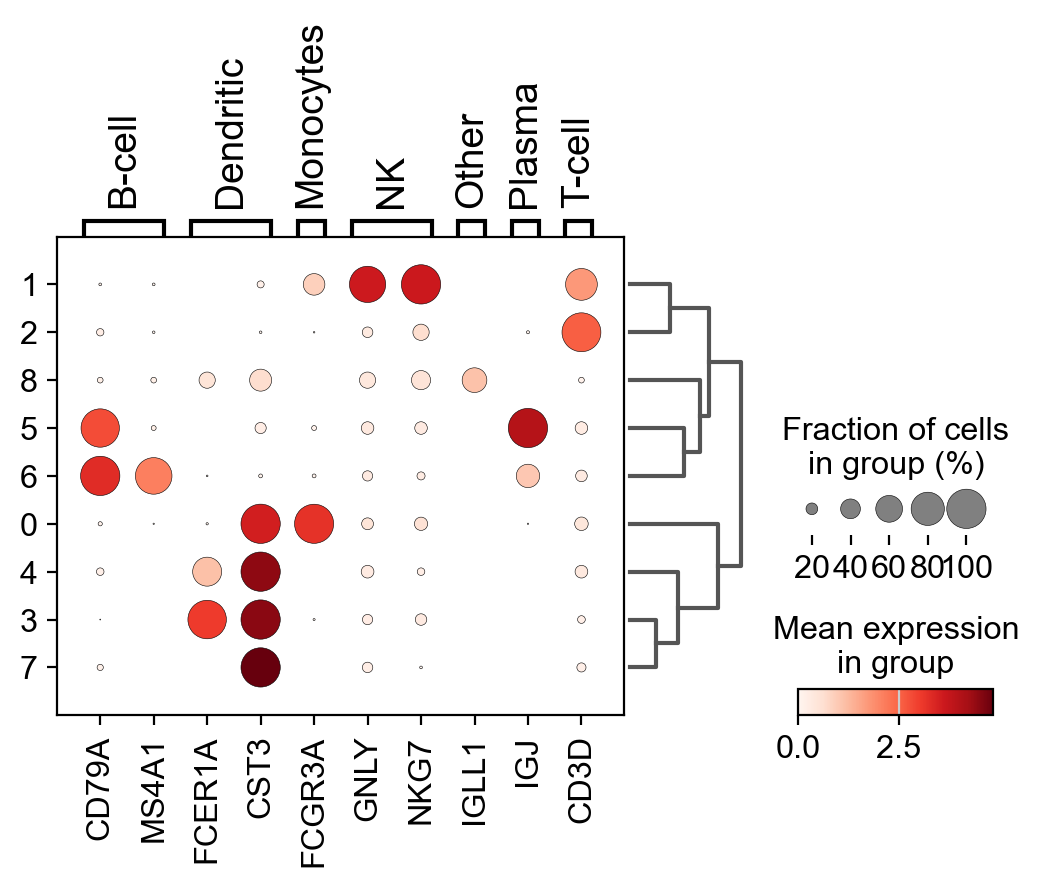

In [14]:
sc.pl.dotplot(pbmc, marker_genes_dict, "clusters", dendrogram=True)

이 그래프를 사용하면 클러스터 4는 B세포, 클러스터 2는 T세포 등에 해당한다는 것을 알 수 있습니다. 이 정보를 사용하여 다음과 같이 수동으로 셀에 주석을 달 수 있습니다:

In [15]:
# create a dictionary to map cluster to annotation label
cluster2annotation = {
    "0": "Monocytes",
    "1": "NK",
    "2": "T-cell",
    "3": "Dendritic",
    "4": "Dendritic",
    "5": "Plasma",
    "6": "B-cell",
    "7": "Dendritic",
    "8": "Other",
}

# add a new `.obs` column called `cell type` by mapping clusters to annotation using pandas `map` function
pbmc.obs["cell type"] = pbmc.obs["clusters"].map(cluster2annotation).astype("category")

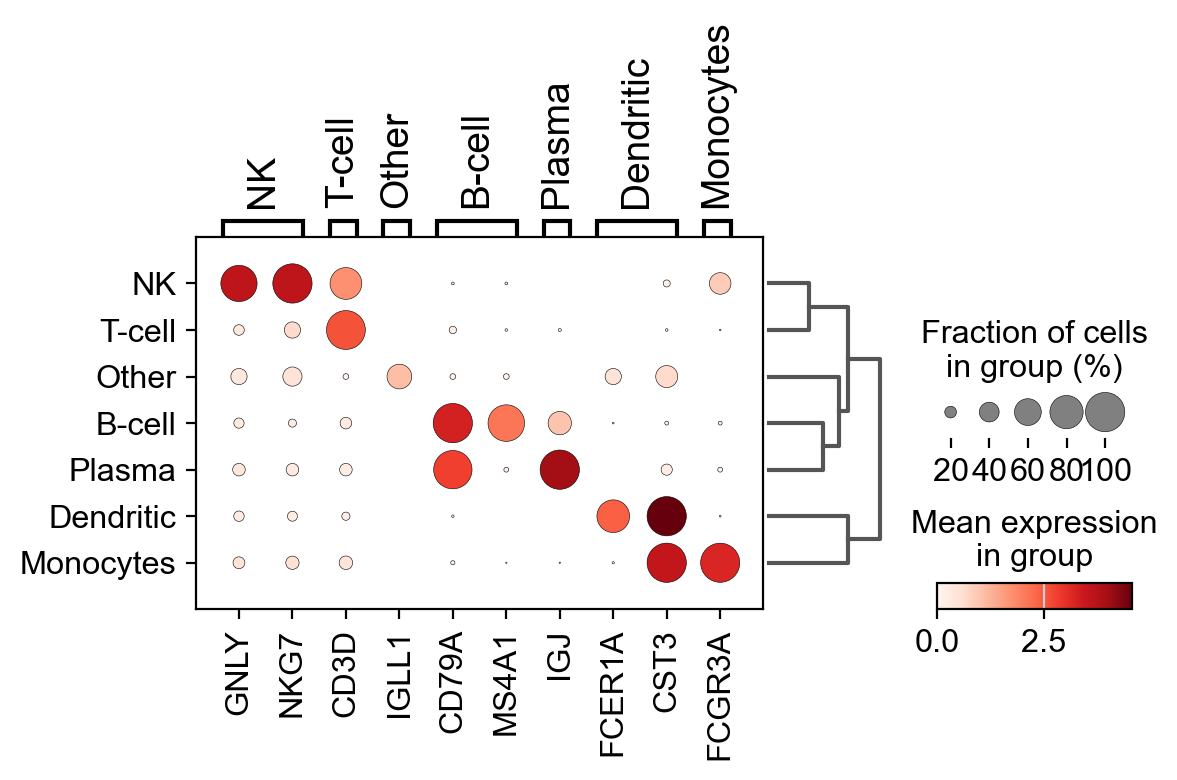

In [16]:
sc.pl.dotplot(pbmc, marker_genes_dict, "cell type", dendrogram=True)

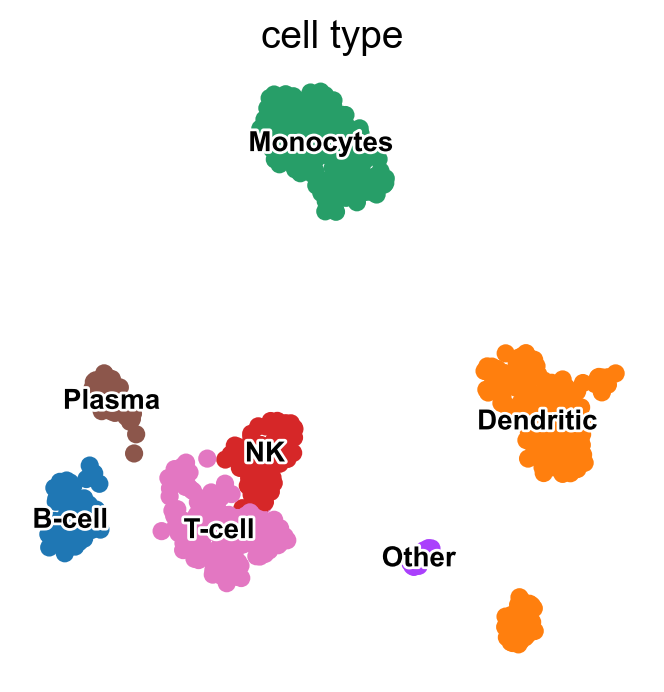

In [17]:
sc.pl.umap(
    pbmc,
    color="cell type",
    legend_loc="on data",
    frameon=False,
    legend_fontsize=10,
    legend_fontoutline=2,
)

### violin plot

바이올린 플롯의 특징과 해석
CD79A 유전자: 이 플롯에서 클러스터 5와 8에서 CD79A 유전자의 발현량을 확인할 수 있다.

**MS4A1 유전자**: 클러스터 5에서 MS4A1 유전자의 발현량 또한 볼 수 있다.

닷플롯(**dotplot**)과의 차이점: 닷플롯이 단순히 평균 발현량과 발현 세포의 비율을 보여주는 반면, 바이올린 플롯은 각 클러스터 내에서 유전자 발현 값의 분포를 시각적으로 보여준다.

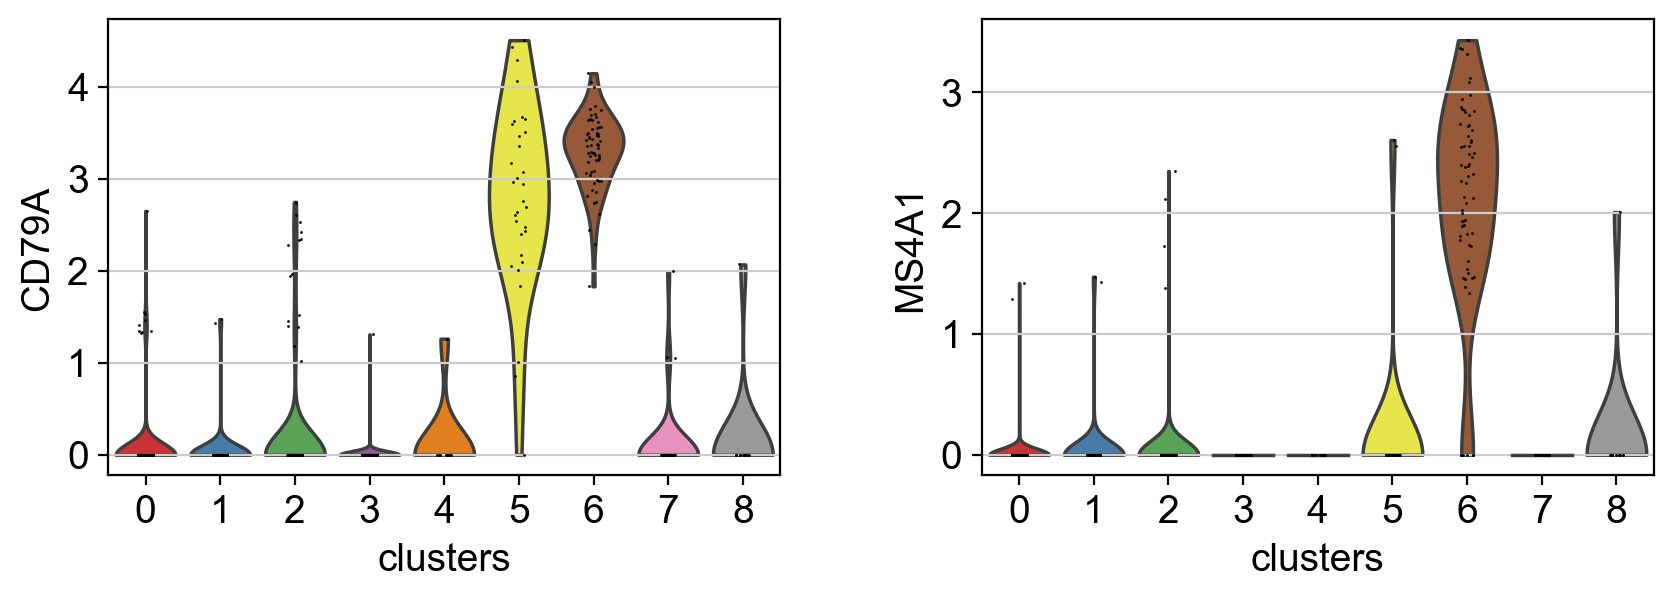

In [18]:
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(pbmc, ["CD79A", "MS4A1"], groupby="clusters")

바이올린 플롯의 활용 예시
이 예시에서는 바이올린 플롯을 사용하여 각기 다른 클러스터 간의 **유전자 수** (**number of genes**)와 **미토콘드리아 유전자의 비율**(**percentage of mitochondrial genes**)을 비교합니다.

이를 통해 클러스터별로 세포의 복잡성(유전자 수)이나 세포 품질(**미토콘드리아 유전자 비율은 종종 세포 손상 지표로 사용됨**)과 같은 중요한 특성들이 어떻게 분포하고 있는지 시각적으로 확인할 수 있습니다.

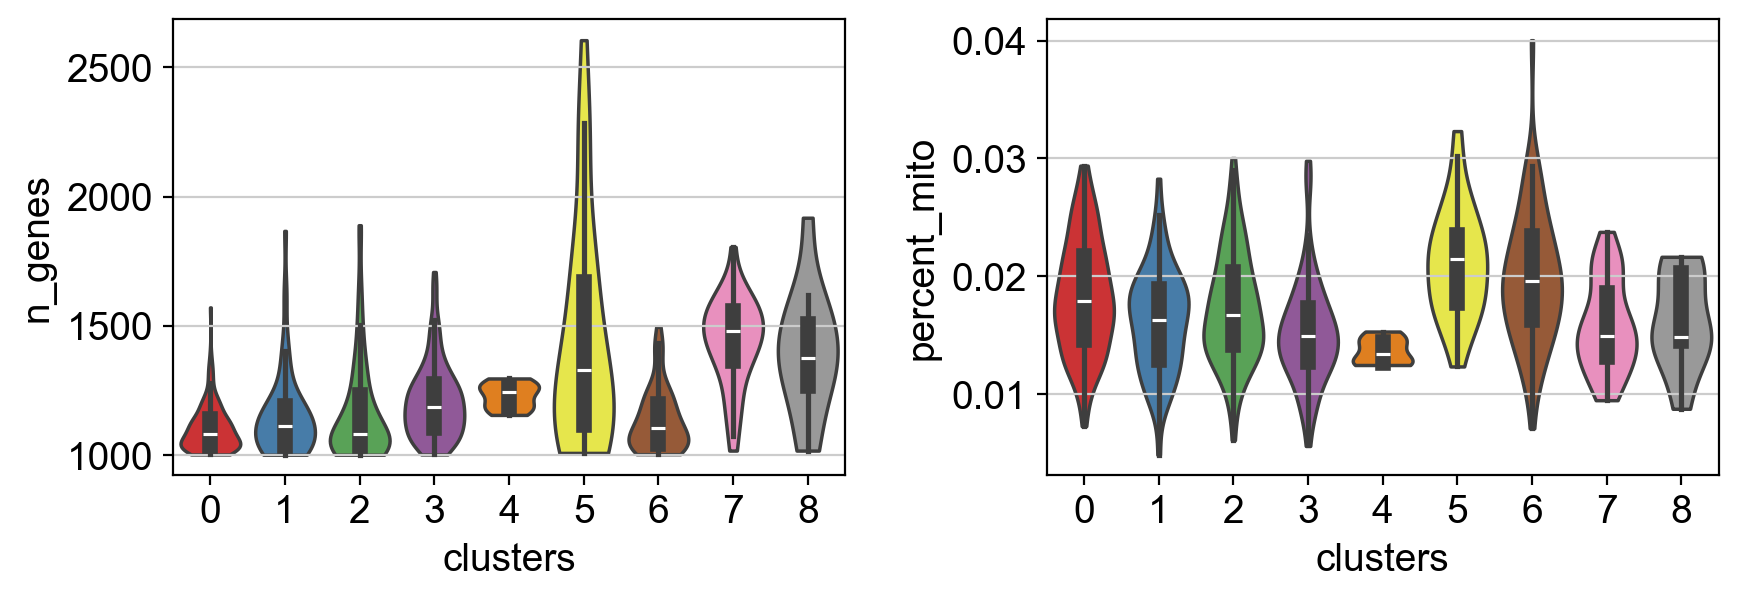

In [19]:
with rc_context({"figure.figsize": (4.5, 3)}):
    sc.pl.violin(
        pbmc,
        ["n_genes", "percent_mito"],
        groupby="clusters",
        stripplot=False,  # remove the internal dots
        inner="box",  # adds a boxplot inside violins
    )

stacked-violin plot (스택 바이올린 플롯)
sc.pl.stacked_violin은 모든 마커 유전자에 대한 바이올린 플롯을 한 번에 보기 위해 사용되는 기능이다.

이 플롯은 여러 바이올린 플롯을 수직으로 쌓아 올려 한눈에 다양한 유전자들의 클러스터별 발현 분포를 비교할 수 있게 해준다. 

이전에 언급했듯이, 이 플롯에도 유사한 클러스터들을 함께 묶어주는 **데드로그램**(**dendrogram**)이 추가됩니다.

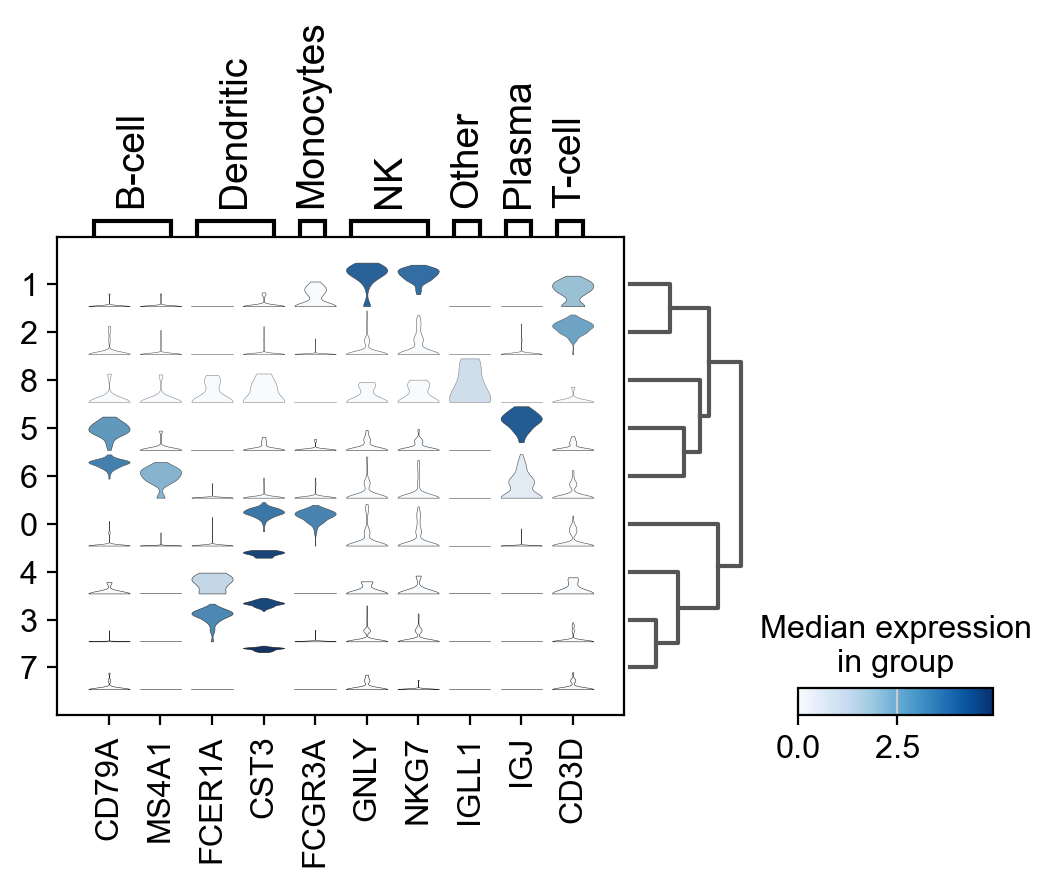

In [20]:
ax = sc.pl.stacked_violin(
    pbmc, marker_genes_dict, groupby="clusters", swap_axes=False, dendrogram=True
)

### Matrixplot (매트릭스 플롯)

매트릭스 플롯은 범주별로 그룹화된 유전자들의 **평균 발현량**을 보여주는 **히트맵**(**heatmap**) 이다.

**dotplot**의 점 색상이 나타내는 정보, 즉 각 그룹(클러스터)에서의 평균 발현량과 본질적으로 동일한 정보를 시각화 한다.

발현량 스케일링: 이 플롯에서는 유전자 발현량을 0에서 1 사이로 스케일링하여 표현함
- 가장 높은 평균 발현값은 1, 가장 낮은 평균 발현값은 0이 된다. 
- 이를 통해 서로 다른 유전자들의 발현 수준을 상대적으로 비교하기 용이함.

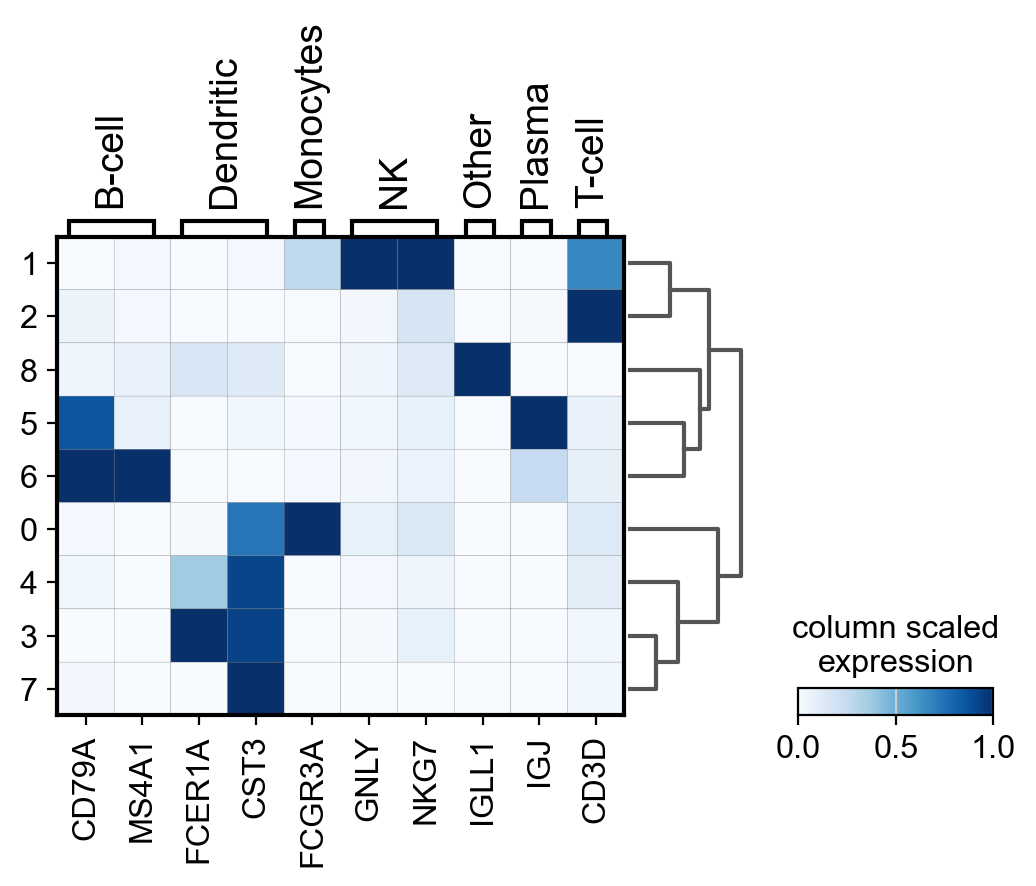

In [21]:
sc.pl.matrixplot(
    pbmc,
    marker_genes_dict,
    "clusters",
    dendrogram=True,
    cmap="Blues",
    standard_scale="var",
    colorbar_title="column scaled\nexpression",
)

유전자 발현량을 정규화하는 또 다른 유용한 방법은 sc.pp.scale을 사용하는 것이다.

여기서는 이 정보를 scale 레이어 아래에 저장한다.

다음 플롯의 최솟값과 최댓값을 조절하고, RdBu_r, 같은 발산형 컬러맵을 사용한다.

( _r은 'reversed', 즉 반전된 것을 의미합니다).

In [22]:
# scale and store results in layer
pbmc.layers["scaled"] = sc.pp.scale(pbmc, copy=True).X

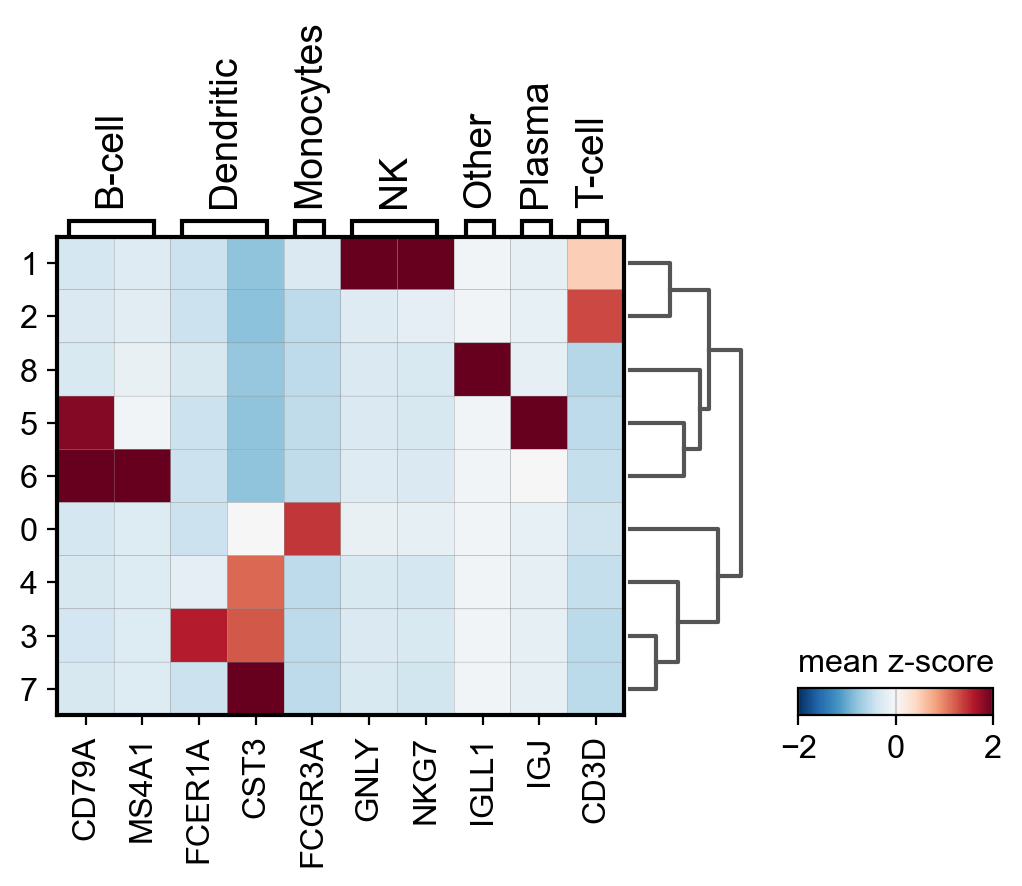

In [23]:
sc.pl.matrixplot(
    pbmc,
    marker_genes_dict,
    "clusters",
    dendrogram=True,
    colorbar_title="mean z-score",
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
)

### Combining plots in subplots

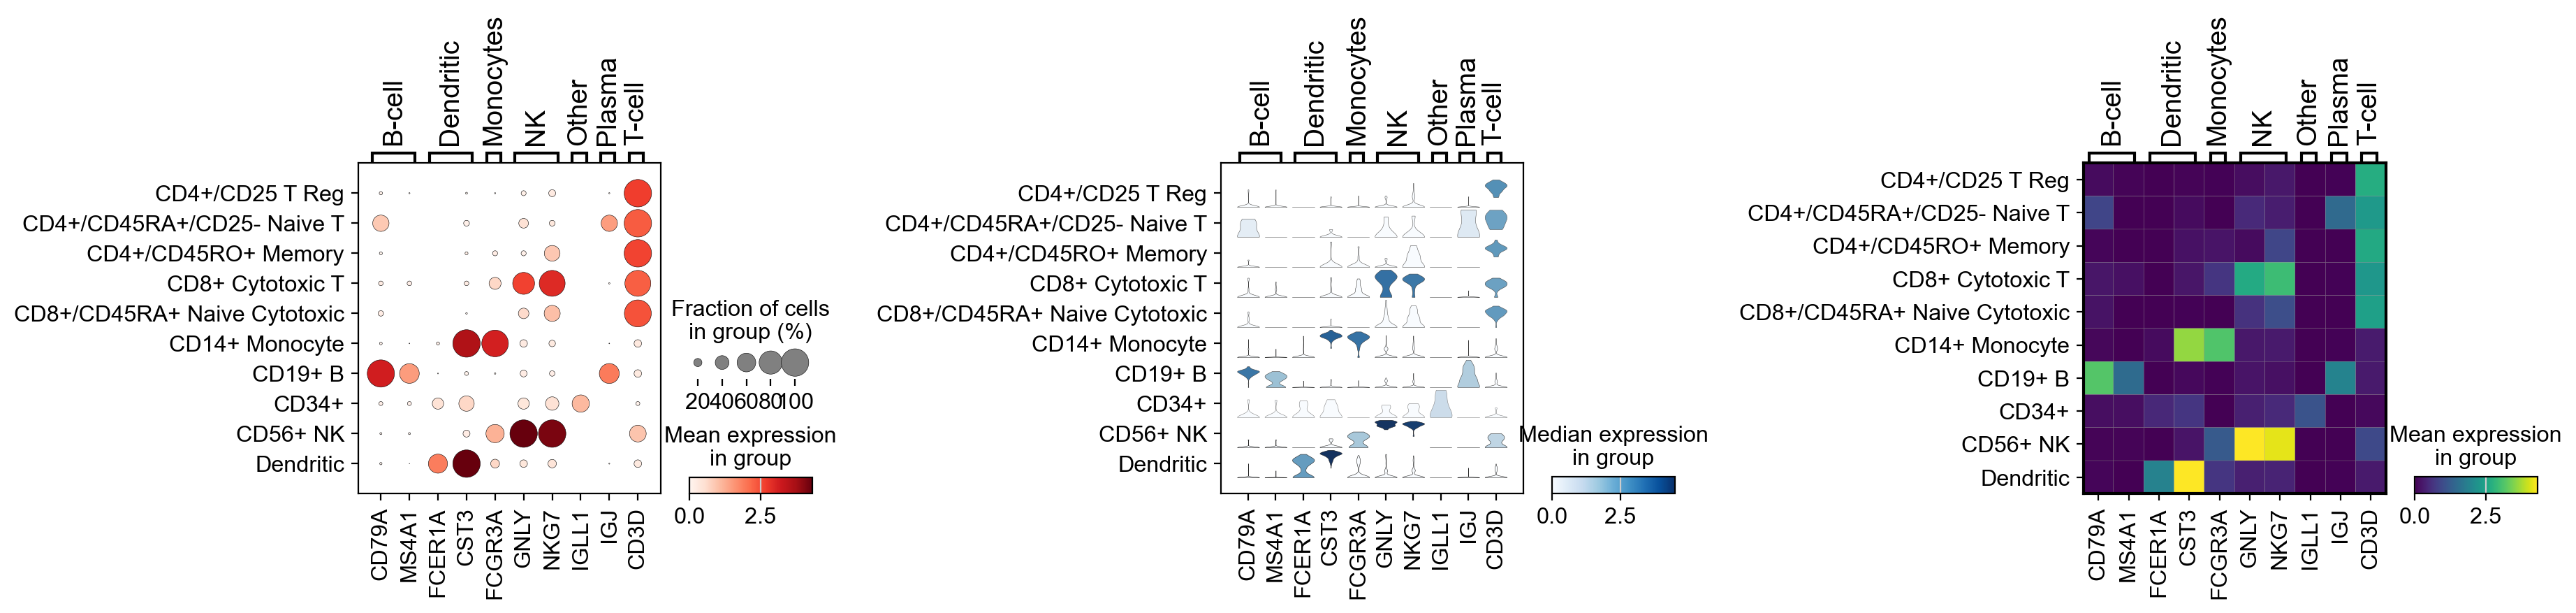

In [24]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 4), gridspec_kw={"wspace": 0.9})

ax1_dict = sc.pl.dotplot(
    pbmc, marker_genes_dict, groupby="bulk_labels", ax=ax1, show=False
)
ax2_dict = sc.pl.stacked_violin(
    pbmc, marker_genes_dict, groupby="bulk_labels", ax=ax2, show=False
)
ax3_dict = sc.pl.matrixplot(
    pbmc, marker_genes_dict, groupby="bulk_labels", ax=ax3, show=False, cmap="viridis"
)

### Heatmaps
히트맵(heatmap)은 이전 플롯들과 달리, 개별 세포들을 축소하지 않고 각각의 행(row)으로 보여준다.

만약 swap_axes=True 옵션을 사용하면, 개별 세포들이 열(column)로 표시된다.

그룹 정보는 히트맵에 추가될 수 있으며, 이는 sc.pl.umap이나 다른 임베딩 플롯에서 볼 수 있는 것과 동일한 색상 코드를 사용하여 나타난다. 

즉, 세포가 속한 클러스터나 그룹에 따라 다른 색상으로 표시됨.

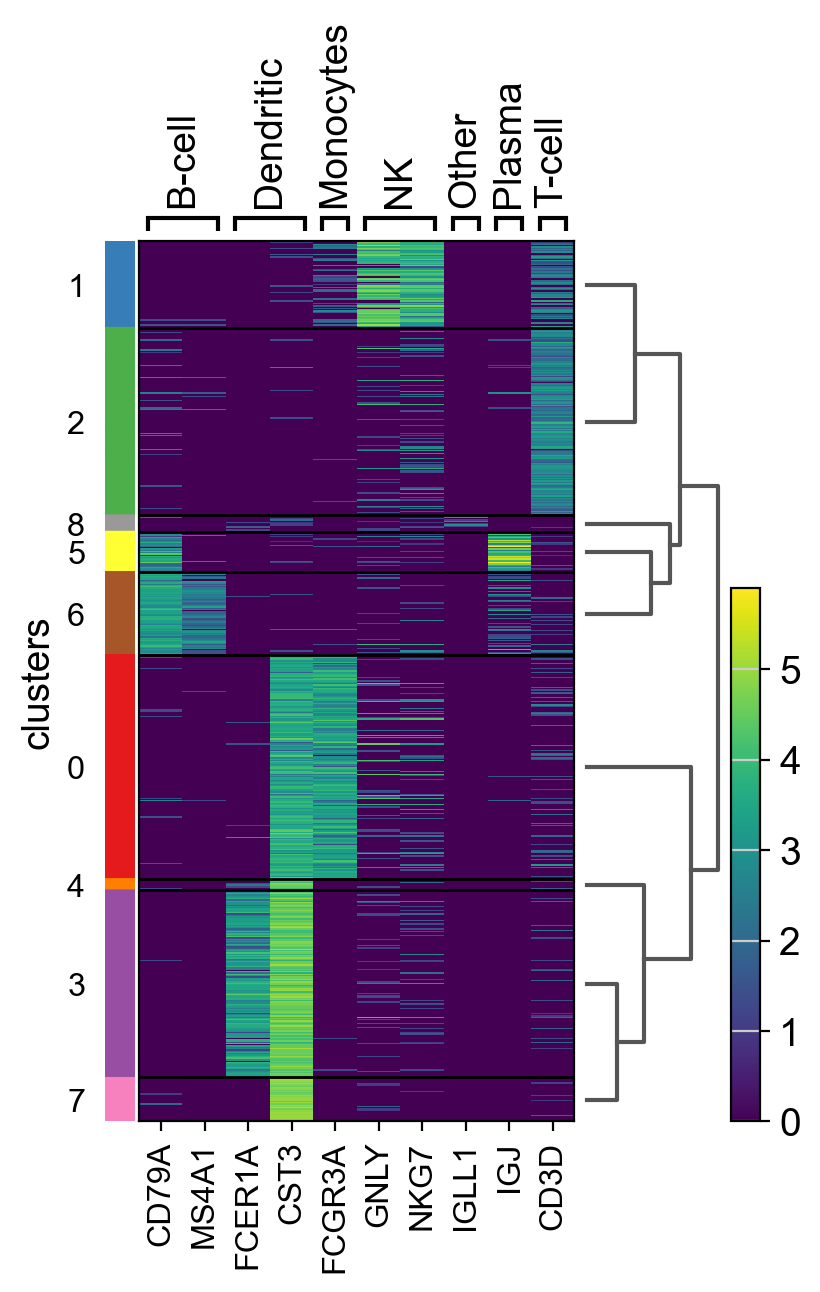

In [25]:
ax = sc.pl.heatmap(
    pbmc, marker_genes_dict, groupby="clusters", cmap="viridis", dendrogram=True
)

**히트맵** 또한 스케일링된 데이터로 그릴 수 있다.

다음 이미지에서 볼 수 있듯이, 이전 매트릭스 플롯과 마찬가지로 최솟값과 최댓값을 조절하고 발산형 컬러맵을 사용함.



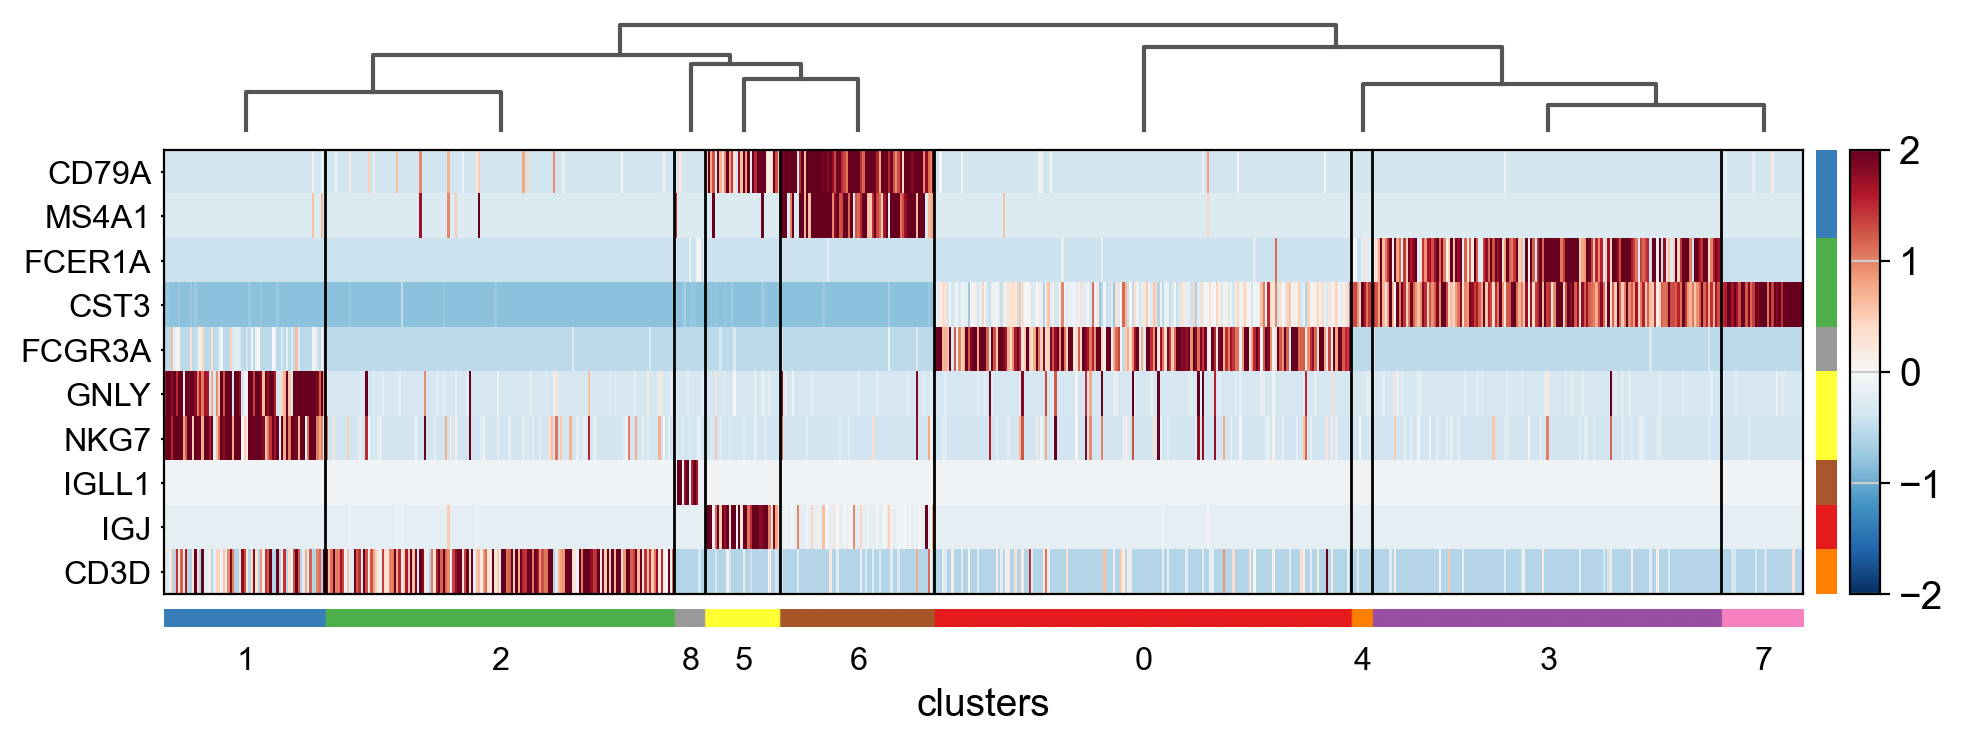

In [26]:
ax = sc.pl.heatmap(
    pbmc,
    marker_genes_dict,
    groupby="clusters",
    layer="scaled",
    vmin=-2,
    vmax=2,
    cmap="RdBu_r",
    dendrogram=True,
    swap_axes=True,
    figsize=(11, 4),
)

### Tracksplot
track plot은 히트맵(heatmap)과 동일한 정보를 보여주지만, 색상 스케일 대신 유전자 발현량이 높이로 표현된다는 점이 다르다.

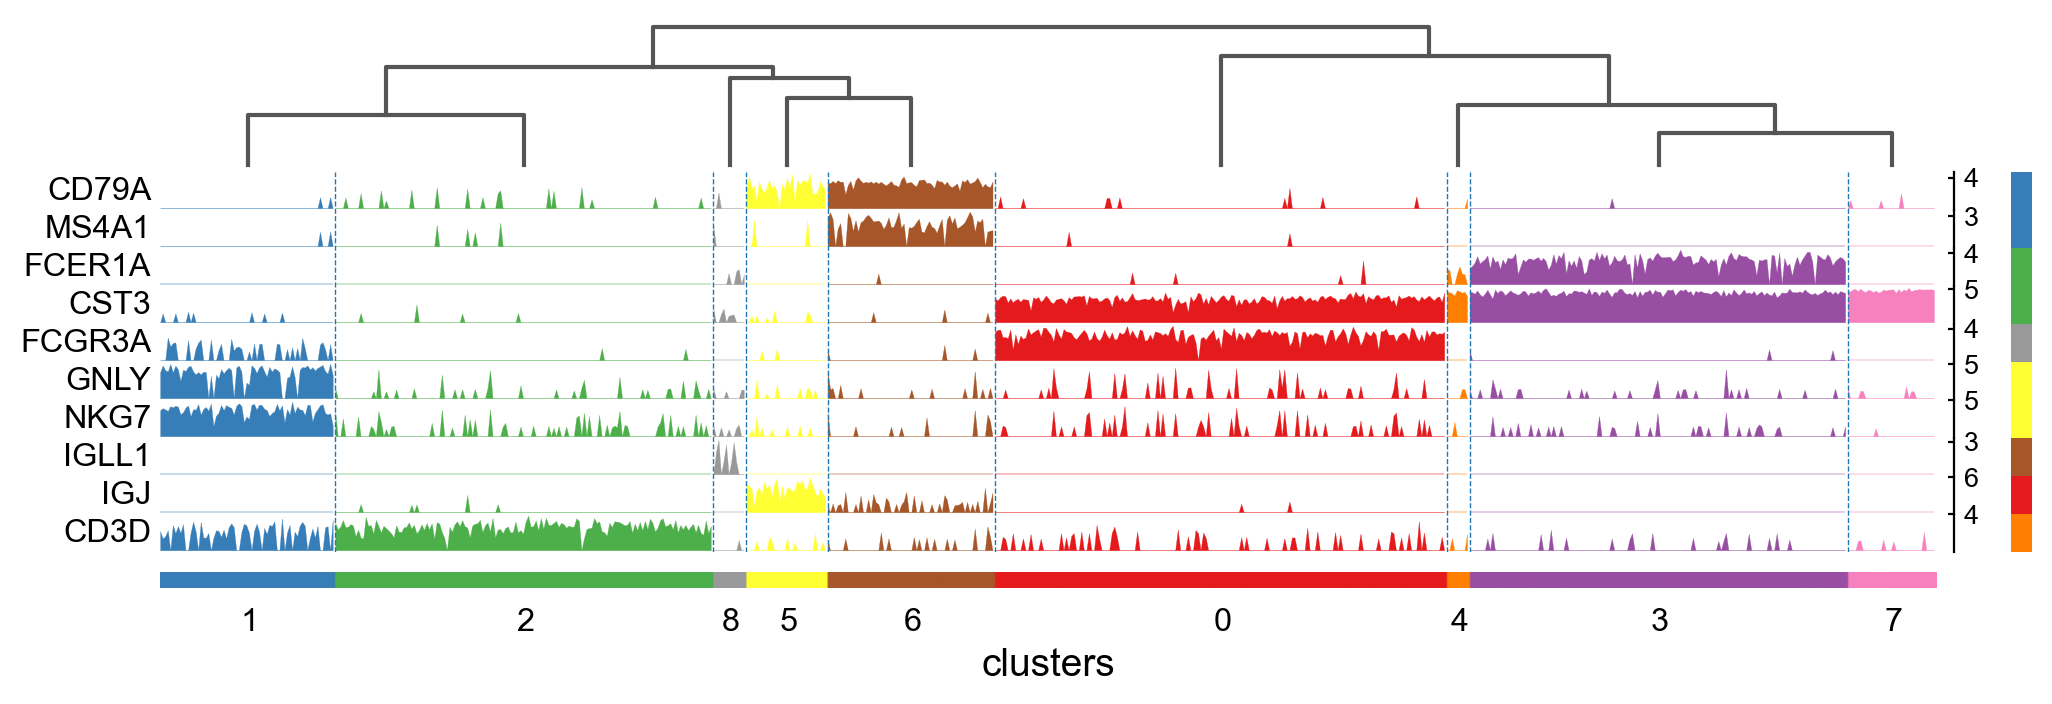

In [27]:
ax = sc.pl.tracksplot(pbmc, marker_genes_dict, groupby="clusters", dendrogram=True)

### Visualization of marker genes

기존에 알려진 유전자 마커를 사용해 클러스터의 특성을 파악하는 대신, 이제는 각 클러스터나 그룹에서 차별적으로 발현되는 유전자들을 직접 식별할 수 있다.

차별적으로 발현되는 유전자들을 찾기 위해 **sc.tl.rank_genes_groups** 함수를 실행한다.

이 함수는 각 세포 그룹을 가져와, 그룹 내의 각 유전자 분포를 해당 그룹에 속하지 않은 모든 다른 세포들의 유전자 분포와 비교한다.

여기서는 10X에서 제공한 원래의 세포 라벨을 사용하여 이 세포 유형들에 대한 마커 유전자를 식별한다.

In [29]:
sc.tl.rank_genes_groups(pbmc, groupby="clusters", method="wilcoxon")

### Visualize marker genes using dotplot

**dotplot**을 사용하면 차별적으로 발현되는 유전자들을 빠르게 한눈에 파악할 수 있다. 

시각화 결과를 더 간결하게 만들기 위해 n_genes=4 옵션을 사용하여 점수가 가장 높은 상위 4개의 유전자만 표시한다.

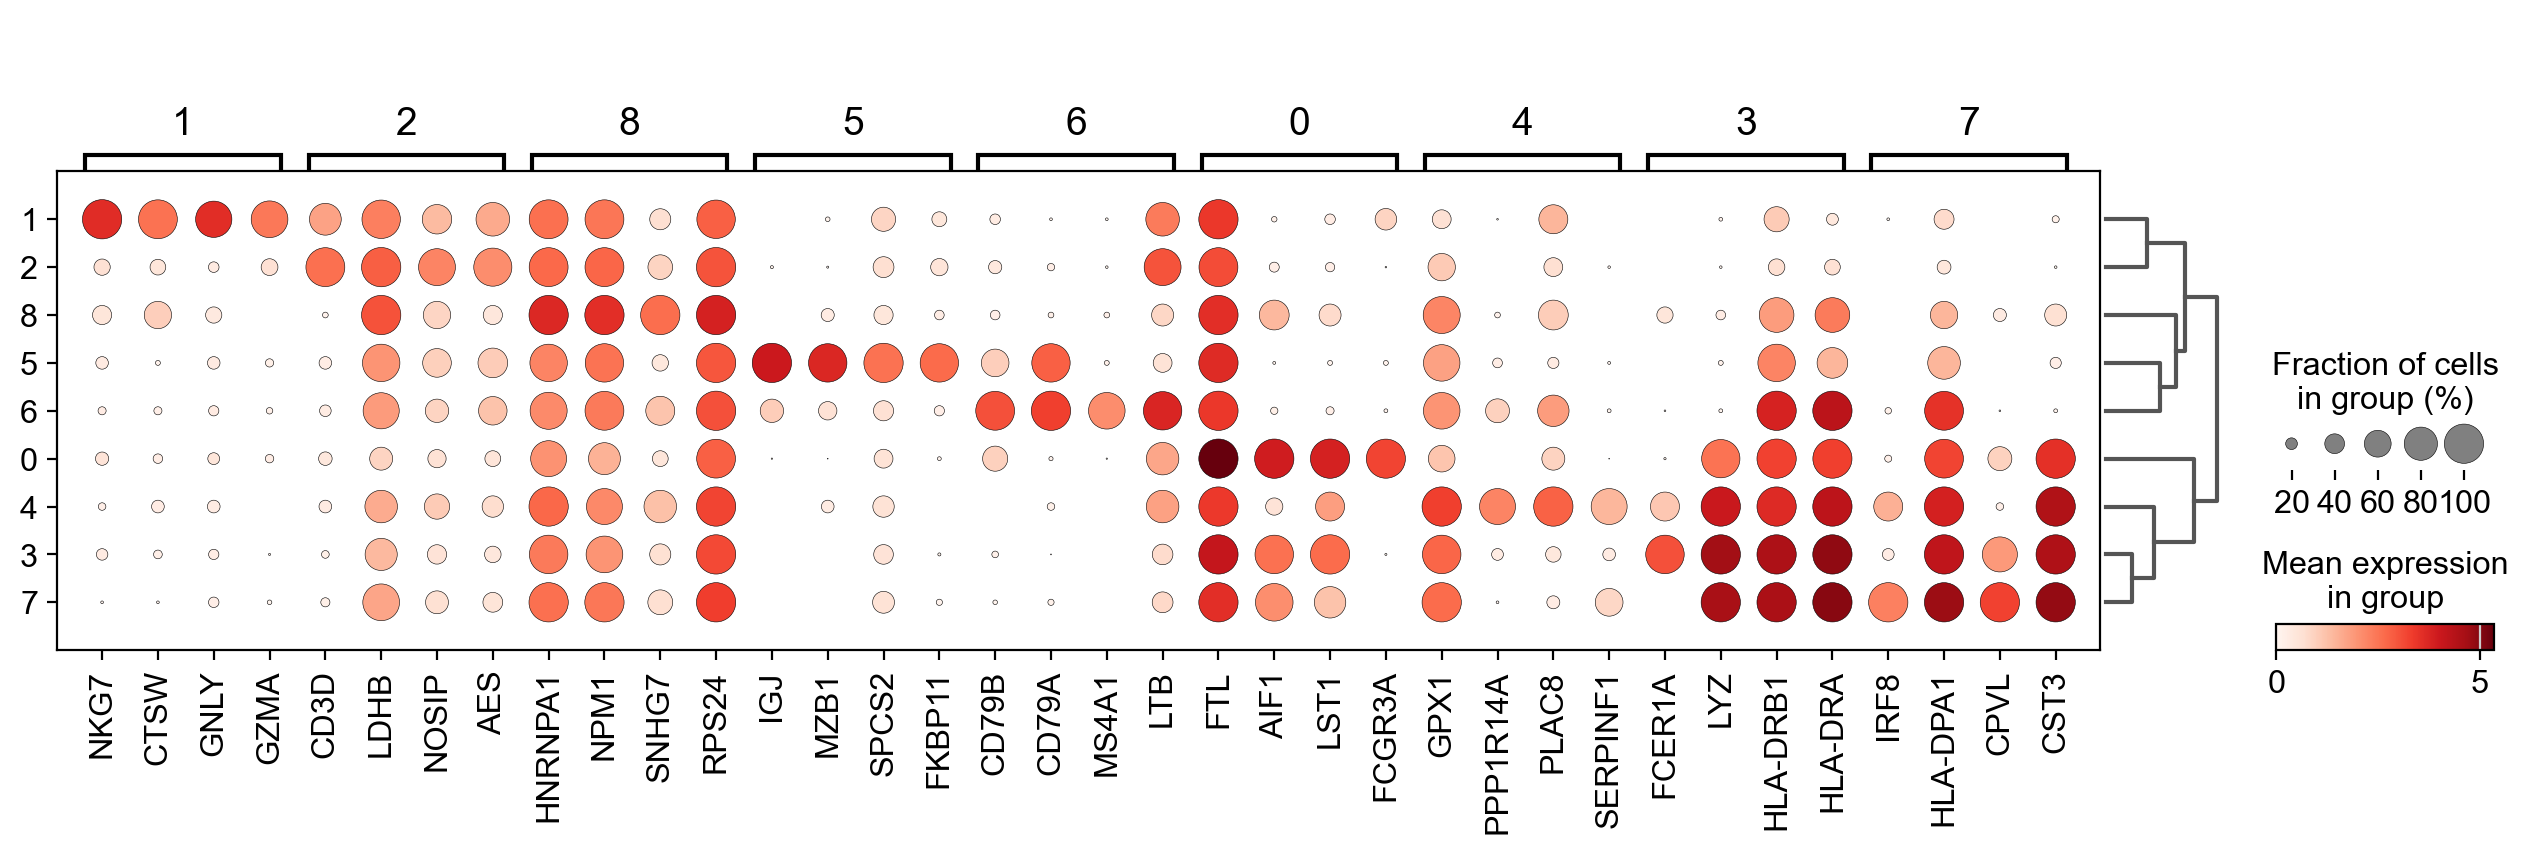

In [30]:
sc.pl.rank_genes_groups_dotplot(pbmc,n_genes=4)

더 나은 표현을 얻기 위해 유전자 발현 대신 로그 변화를 그래프로 나타낼 수 있다.

또한 세포 유형 발현과 나머지 세포 사이에 로그 폴드 변화 >=3인 유전자에 초점을 맞추고자 한다.

이 경우, 우리는 값 to_plot = 'logfoldchanges', min_logfoldchange=3를 설정함.

로그 접힘 변화는 발산 스케일이기 때문에 최소값과 최대값을 조정하여 플롯하고 발산 색상 맵을 사용함.

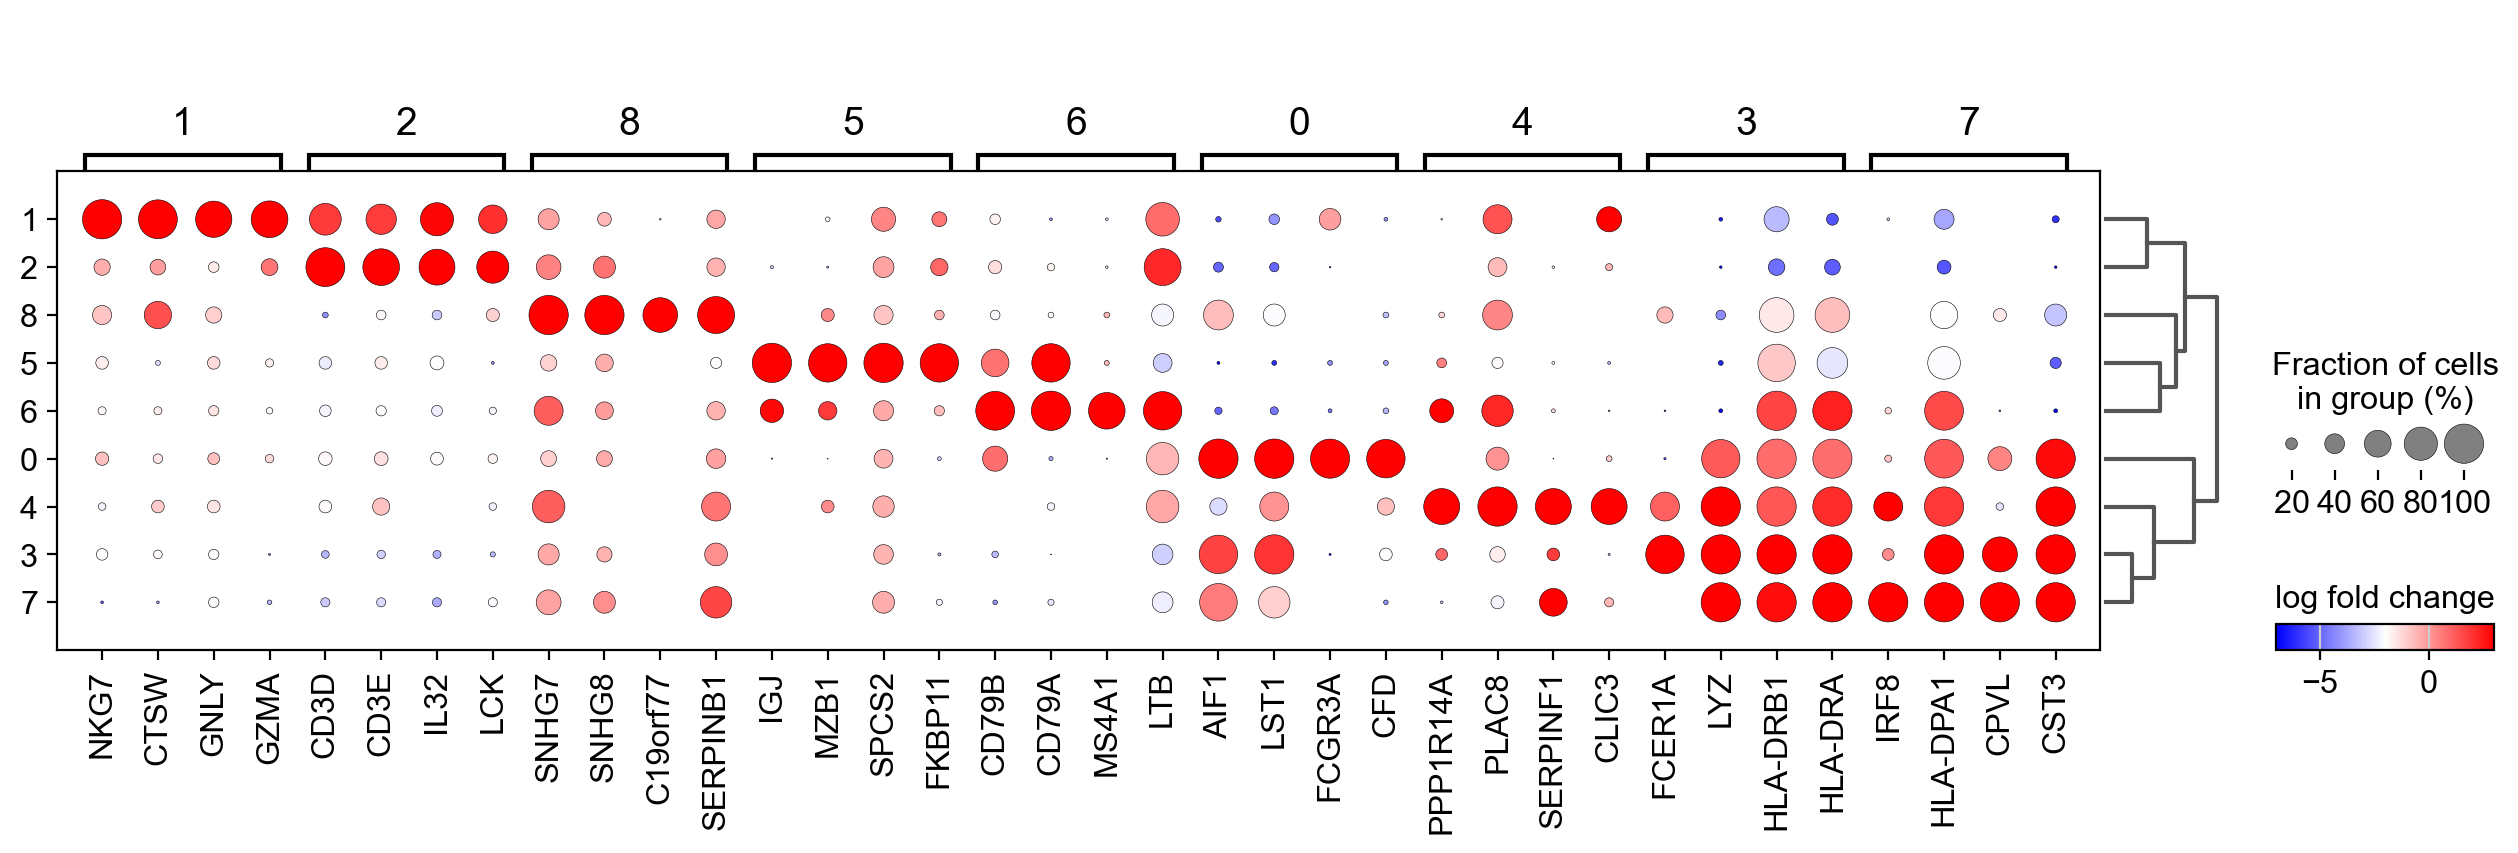

In [31]:
sc.pl.rank_genes_groups_dotplot(
    pbmc,
    n_genes=4,
    values_to_plot='logfoldchanges',
    min_logfoldchange=3,
    vmax=3,
    vmin=-7,
    cmap='bwr',
)

### Focusing on particular groups
다음으로, 두 그룹에만 초점을 맞춘 도트 플롯을 사용한다.
- 두 그룹에만 초점을 맞춰서 dotplot을 사용한다.

(groups 옵션은 바이올린, 히트맵, 매트릭스 플롯에서도 사용 가능하다.)
- **n_genes=30** 으로 설정했는데, 이는 **min_logfoldchange=4** 만족하는 모든 유전자들을 최대 30개 까지 보여주기 위함이다.

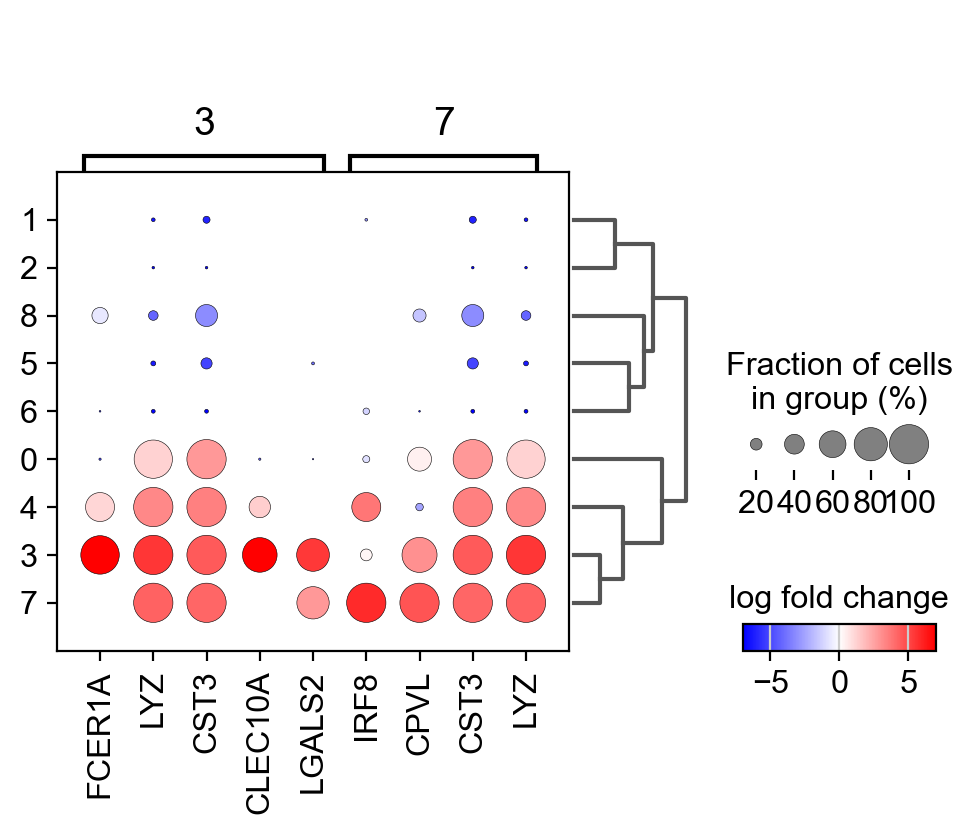

In [32]:
sc.pl.rank_genes_groups_dotplot(
    pbmc,
    n_genes=30,
    values_to_plot='logfoldchanges',
    min_logfoldchange=4,
    vmax=7,
    vmin=-7,
    cmap='bwr',
    groups=['3', '7'],
)

### Visualize marker genes using matrixplot

다음 플롯에서는 이전에 계산된 '스케일드' 값(레이어 스케일로 저장)을 사용하고 발산 색상 맵을 사용한다.


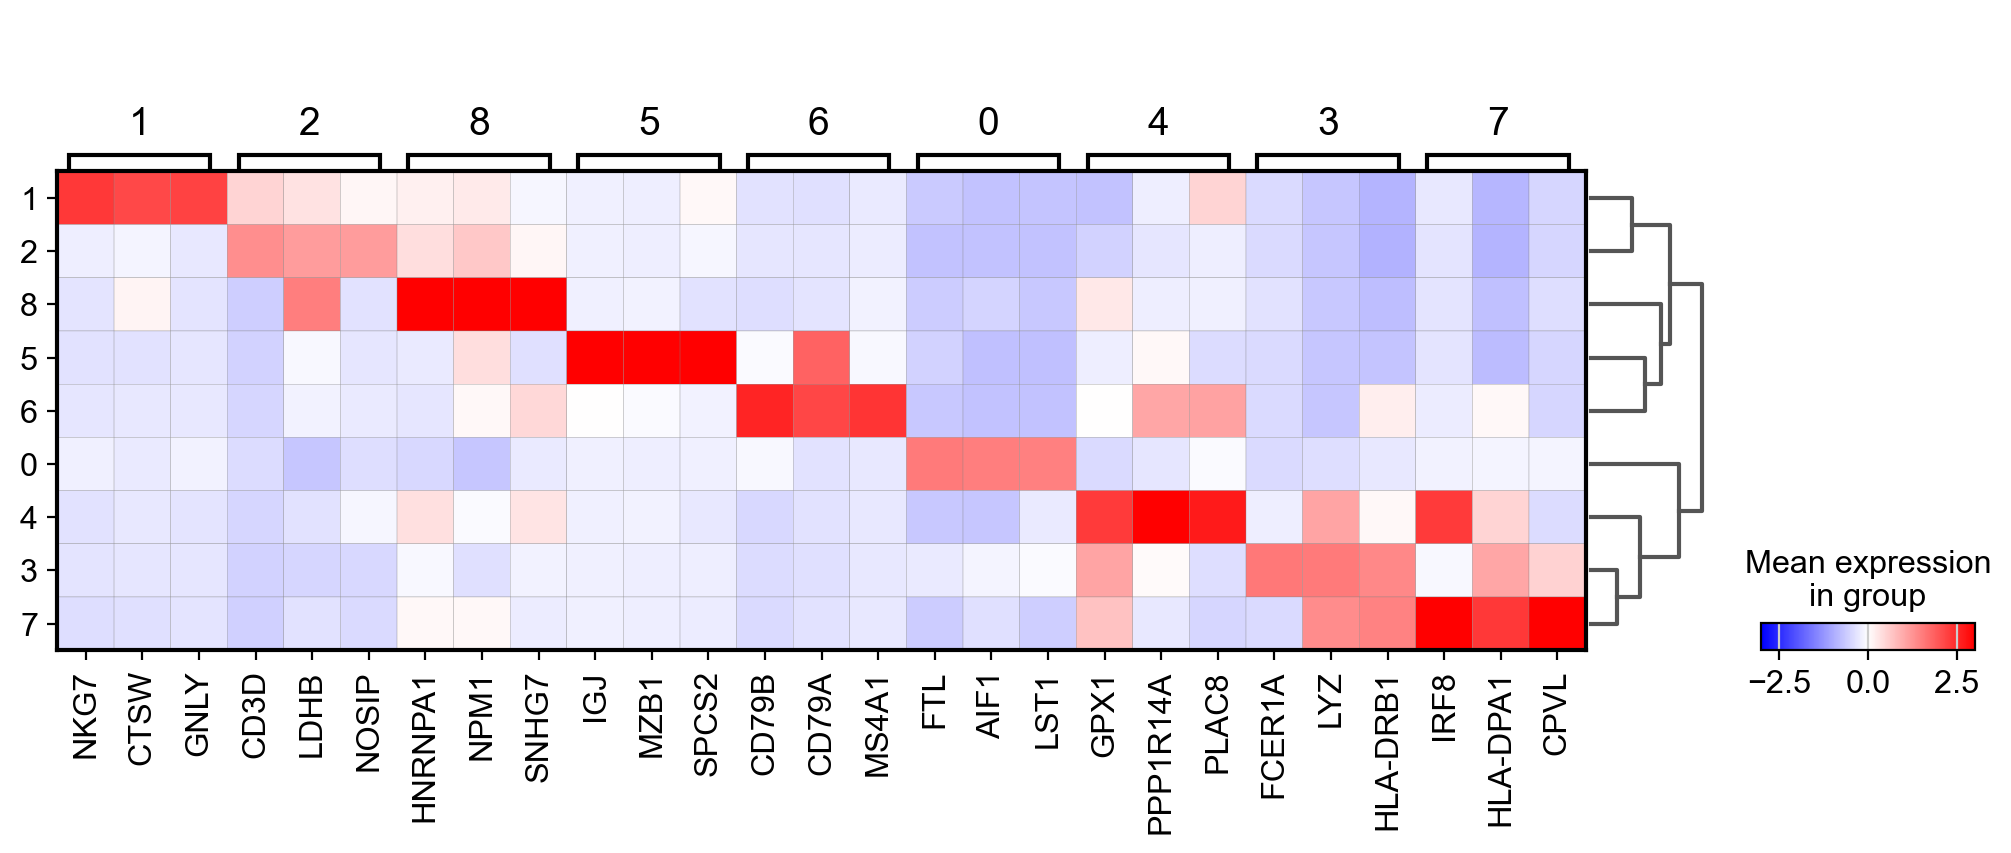

In [33]:
sc.pl.rank_genes_groups_matrixplot(
    pbmc,
    n_genes=3, 
    use_raw=False,
    vmin=-3,
    vmax=3,
    cmap='bwr',
    layer='scaled'
)

### Visualize marker genes using stacked violin plots

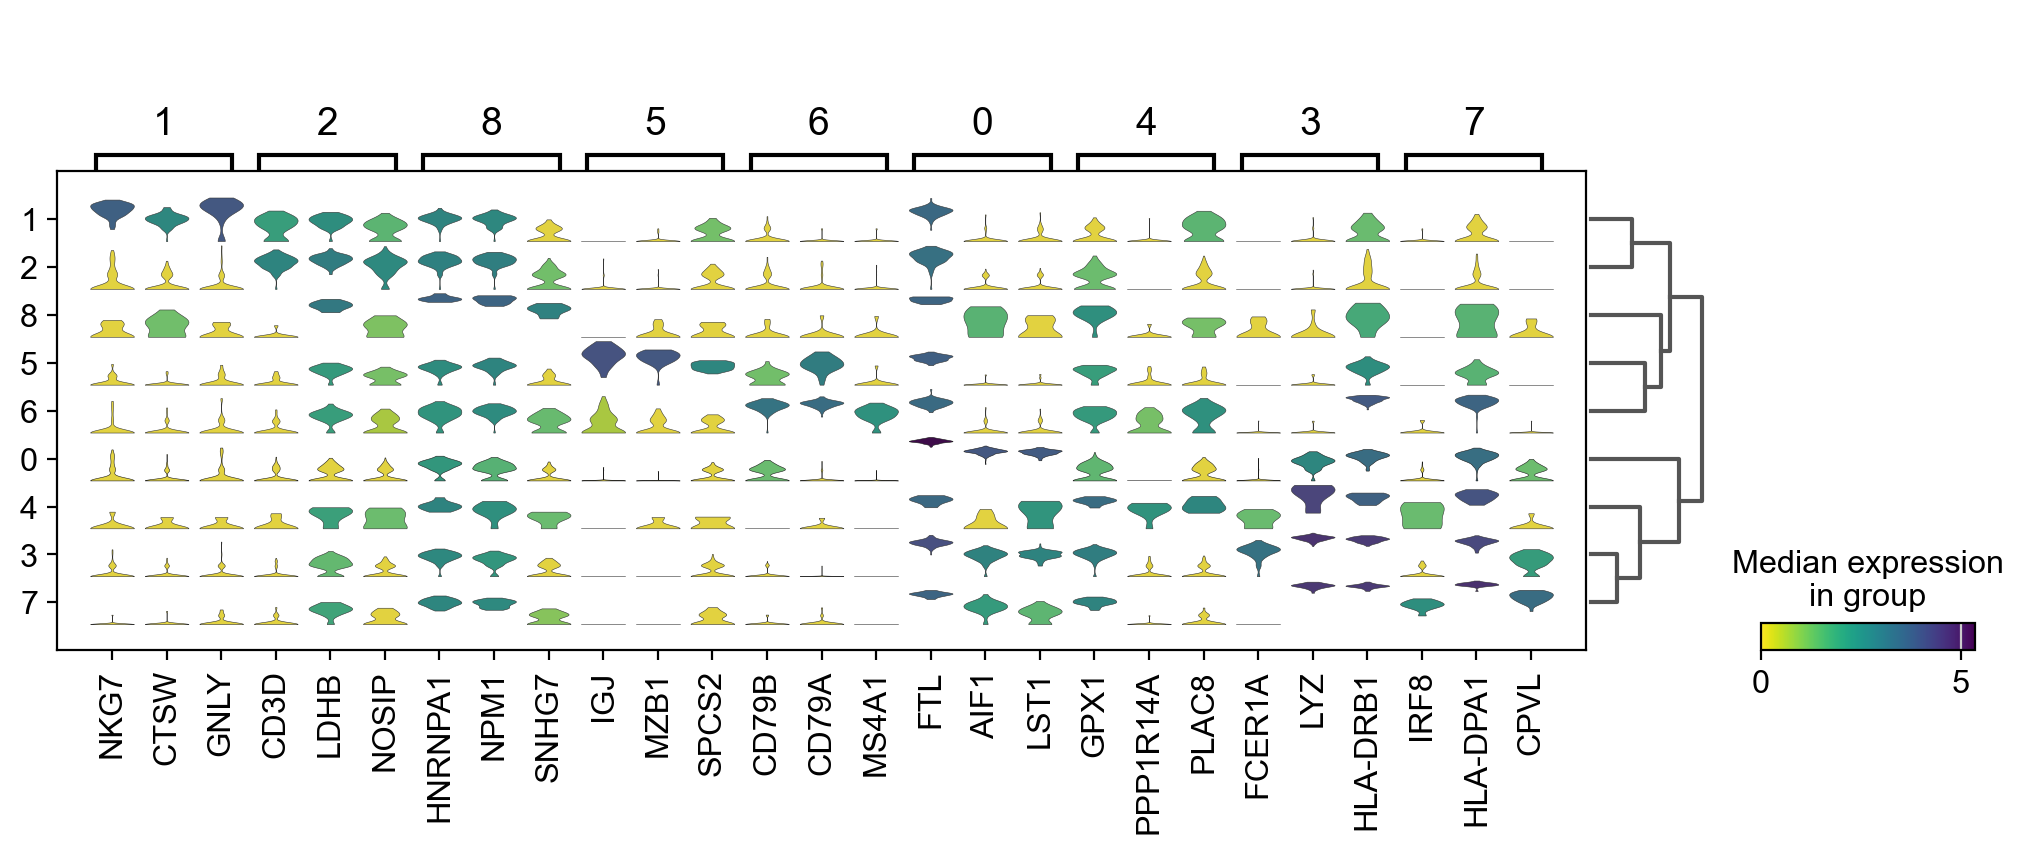

In [34]:
sc.pl.rank_genes_groups_stacked_violin(
    pbmc,
    n_genes=3,
    cmap='viridis_r'
)

### Visualize marker genes using heatmap

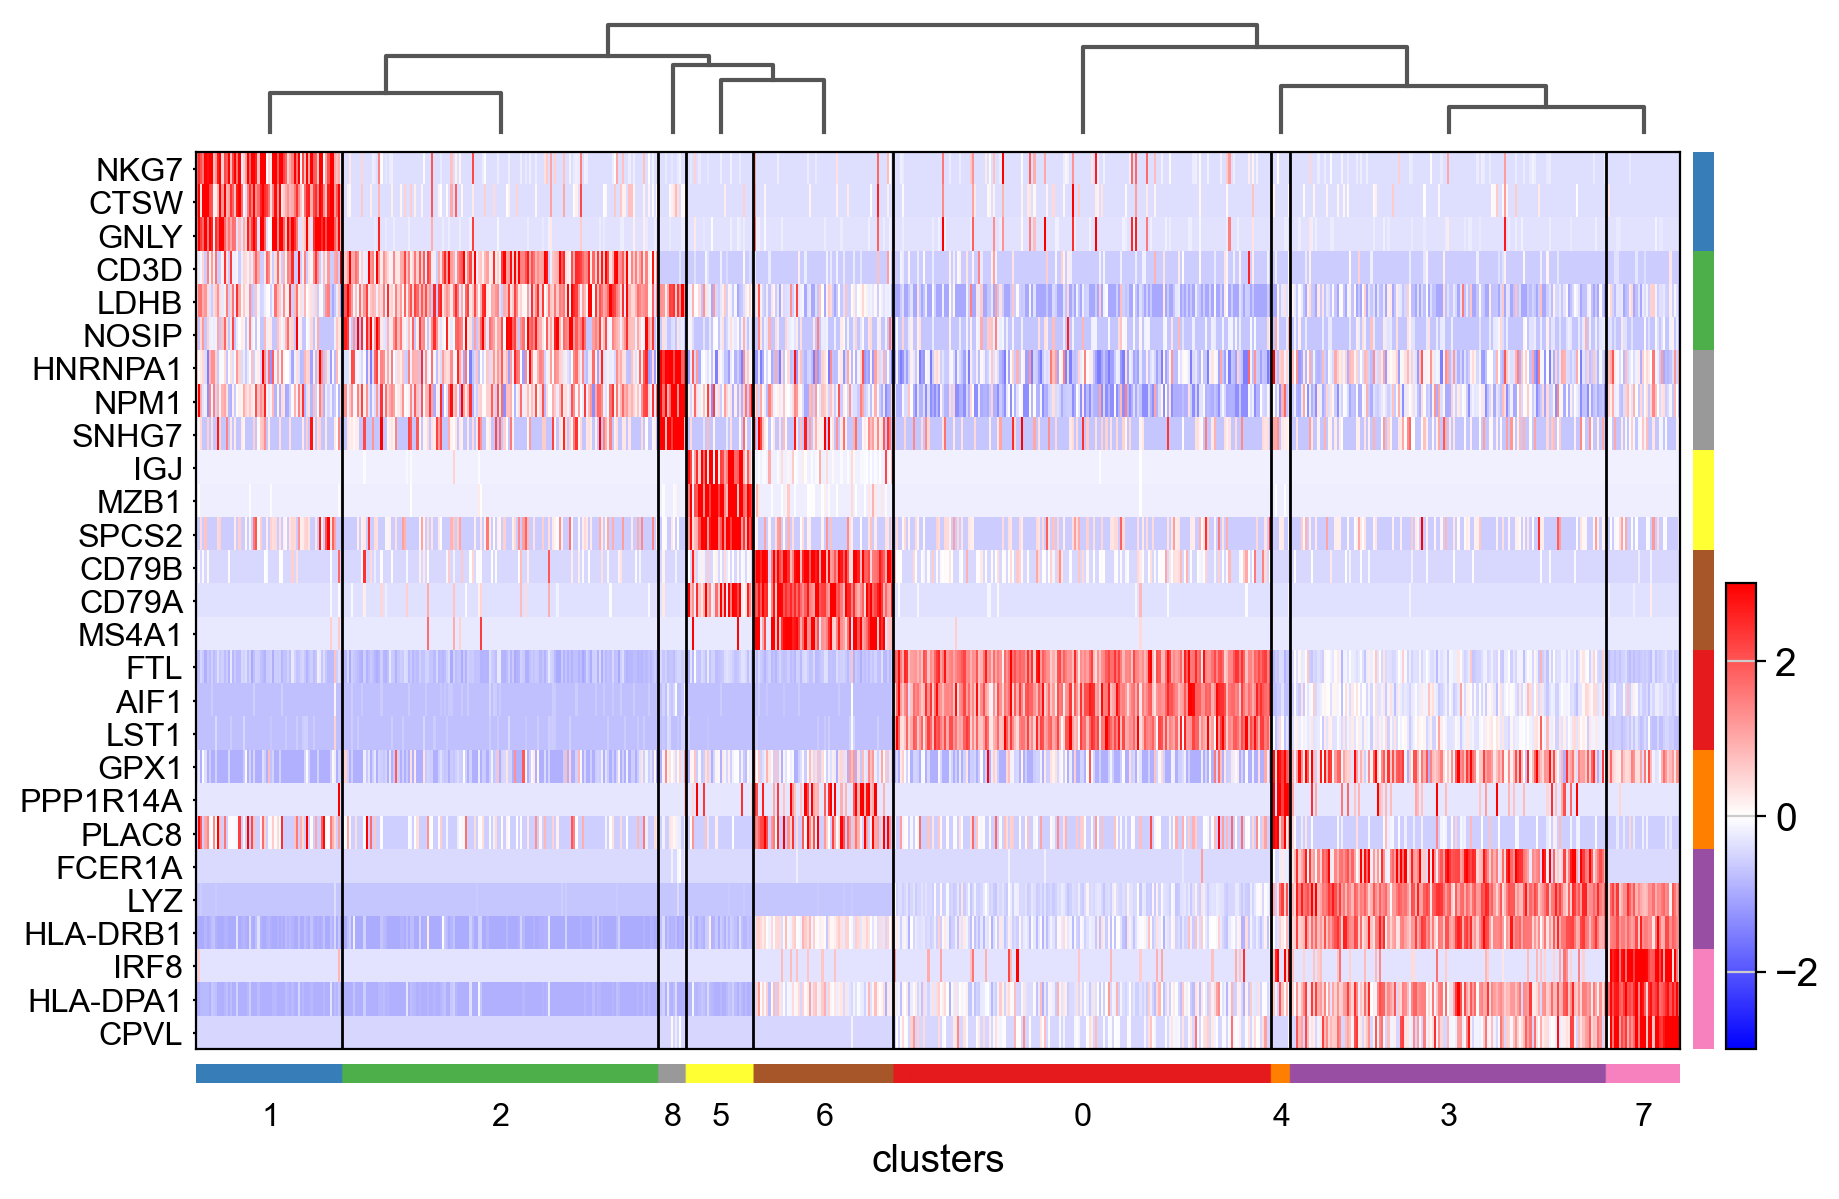

In [35]:
sc.pl.rank_genes_groups_heatmap(
    pbmc,
    n_genes=3,
    use_raw=False,
    swap_axes=True,
    vmin=-3,
    vmax=3,
    cmap="bwr",
    layer="scaled",
    figsize=(10, 7),
    show=False,
);

카테고리당 10개의 유전자를 표시하고 유전자 레이블을 끄고 축을 바꾼다.

이미지를 바꿈으로써 '브래킷' 대신 카테고리의 색상 코드가 표시되는 것을 확인한다.

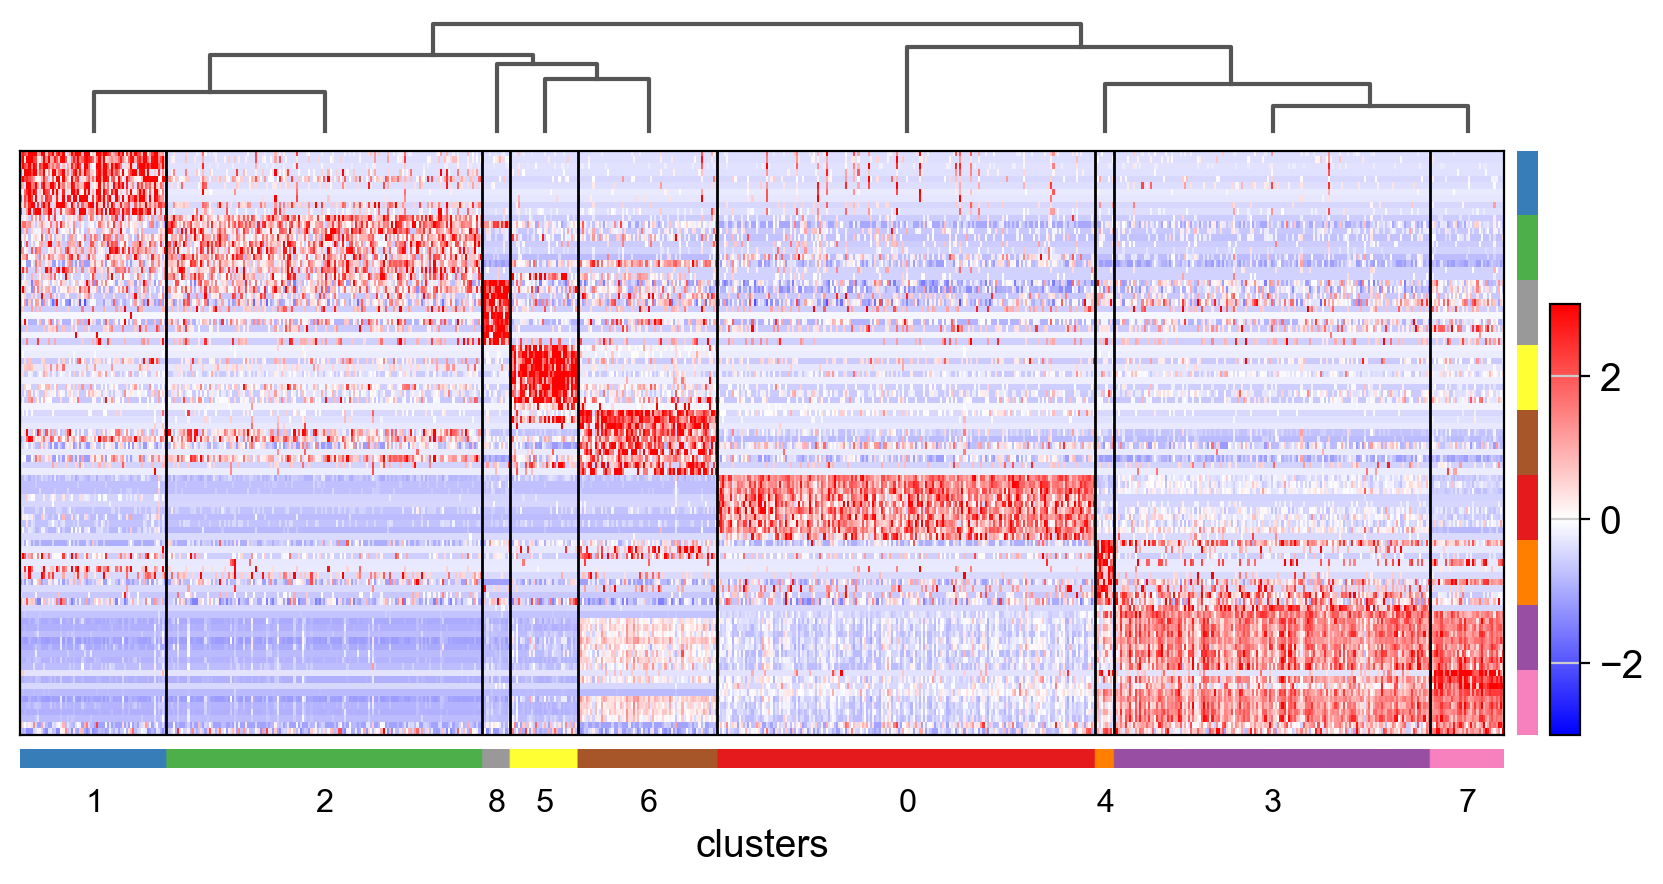

In [36]:
sc.pl.rank_genes_groups_heatmap(
    pbmc,
    n_genes=10,
    use_raw=False,
    swap_axes=True,
    show_gene_labels=False,
    vmin=-3,
    vmax=3,
    cmap="bwr",
)

### Visualize marker genes using tracksplot

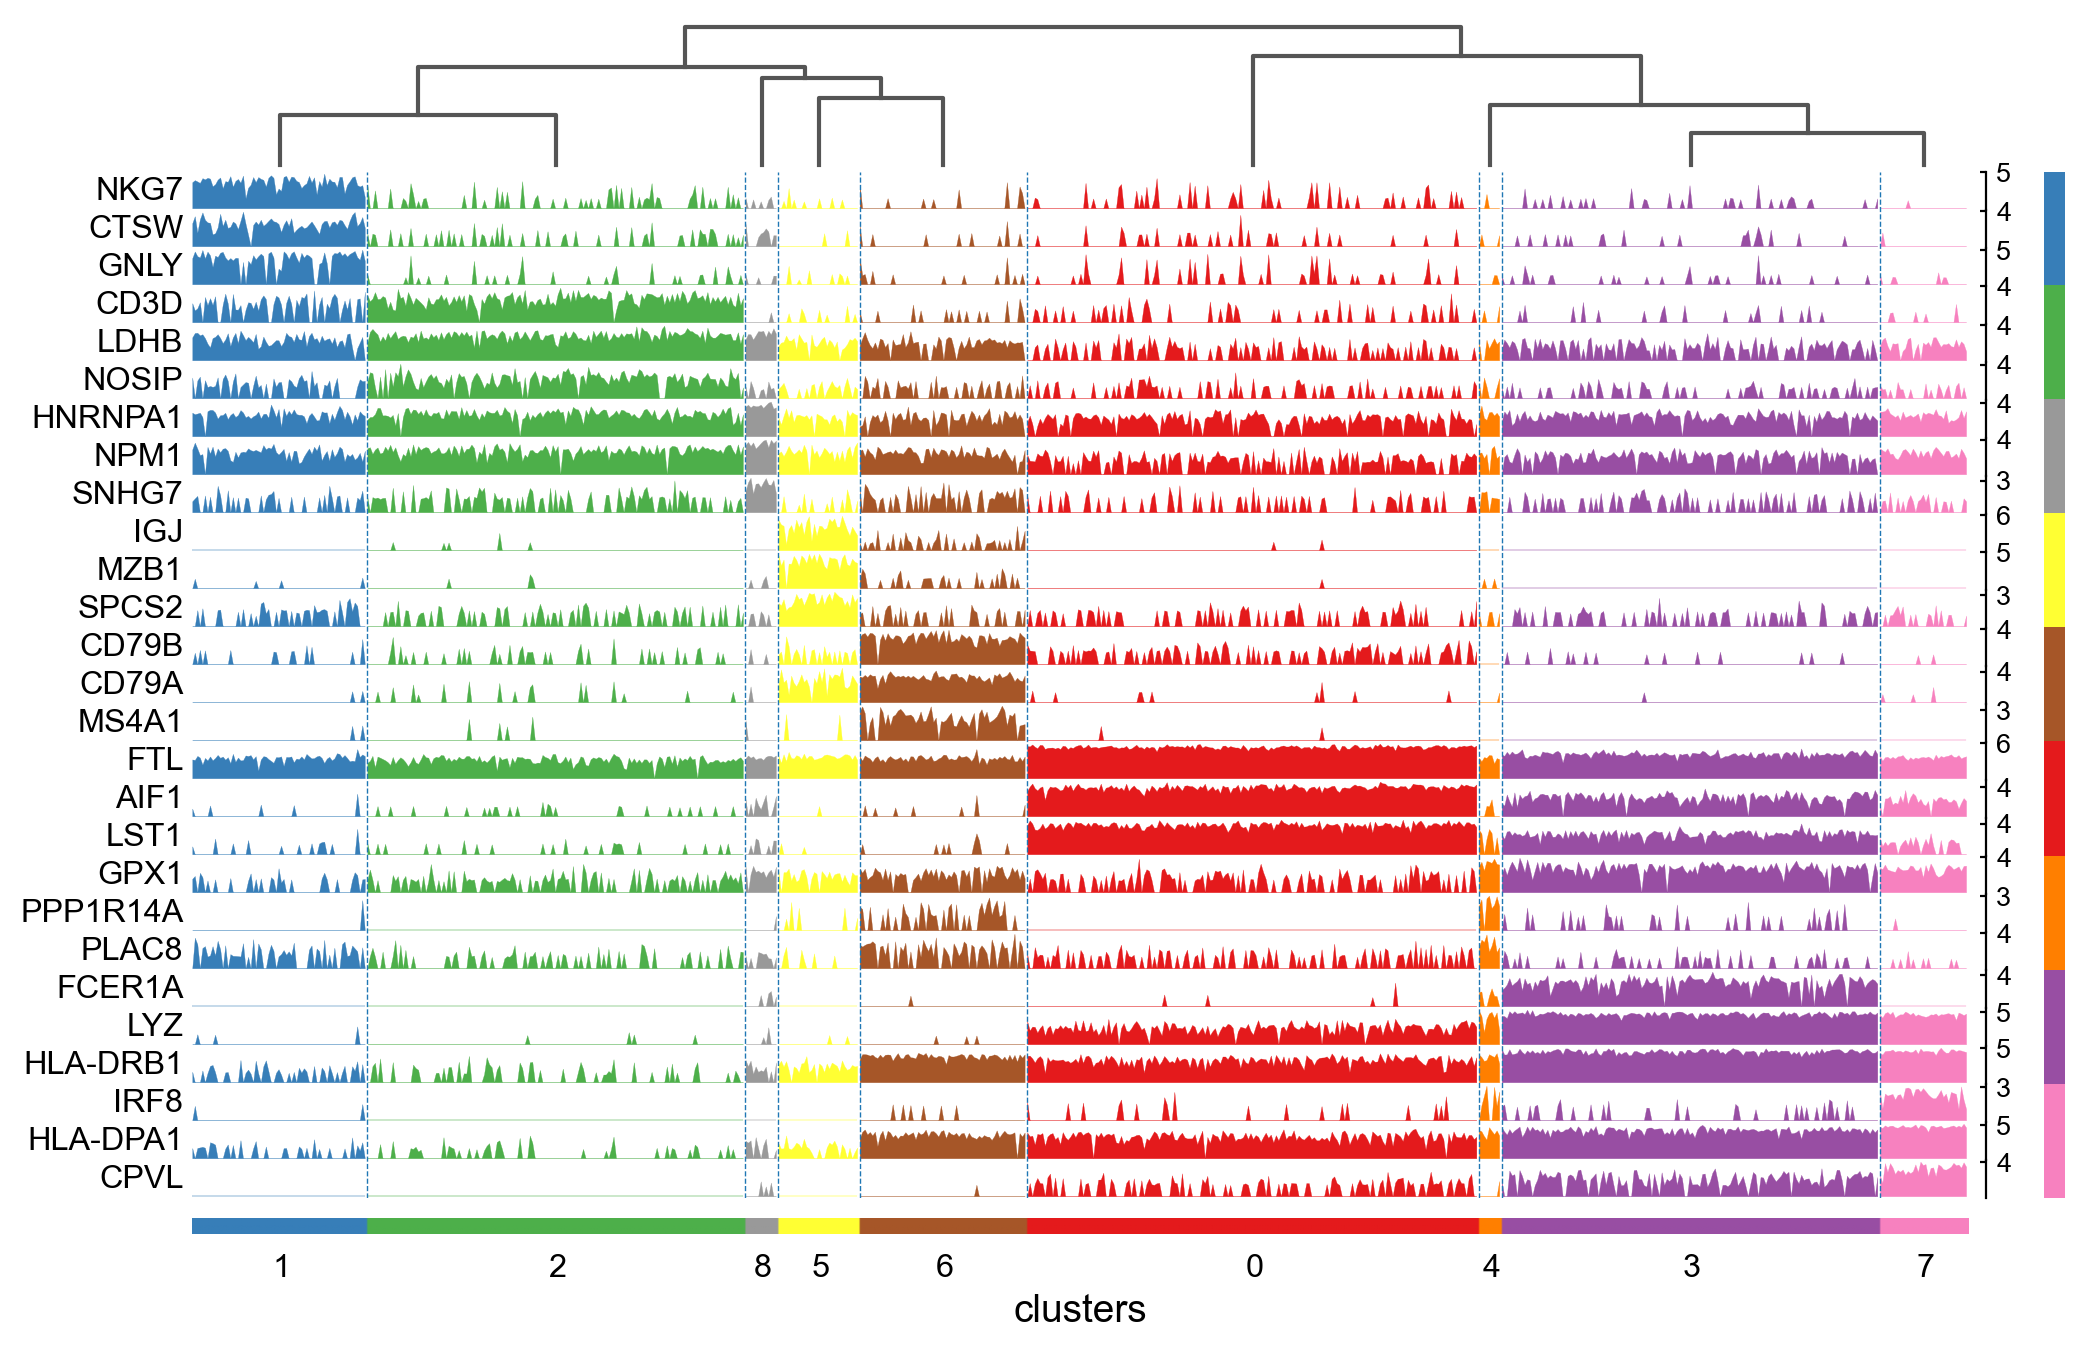

In [37]:
sc.pl.rank_genes_groups_tracksplot(
    pbmc,
    n_genes=3
)

Scanpy에서는 모든 그룹에 대해 분할 바이올린 플롯을 사용하여 마커 유전자를 한 번에 비교하는 것이 매우 쉽다.

/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


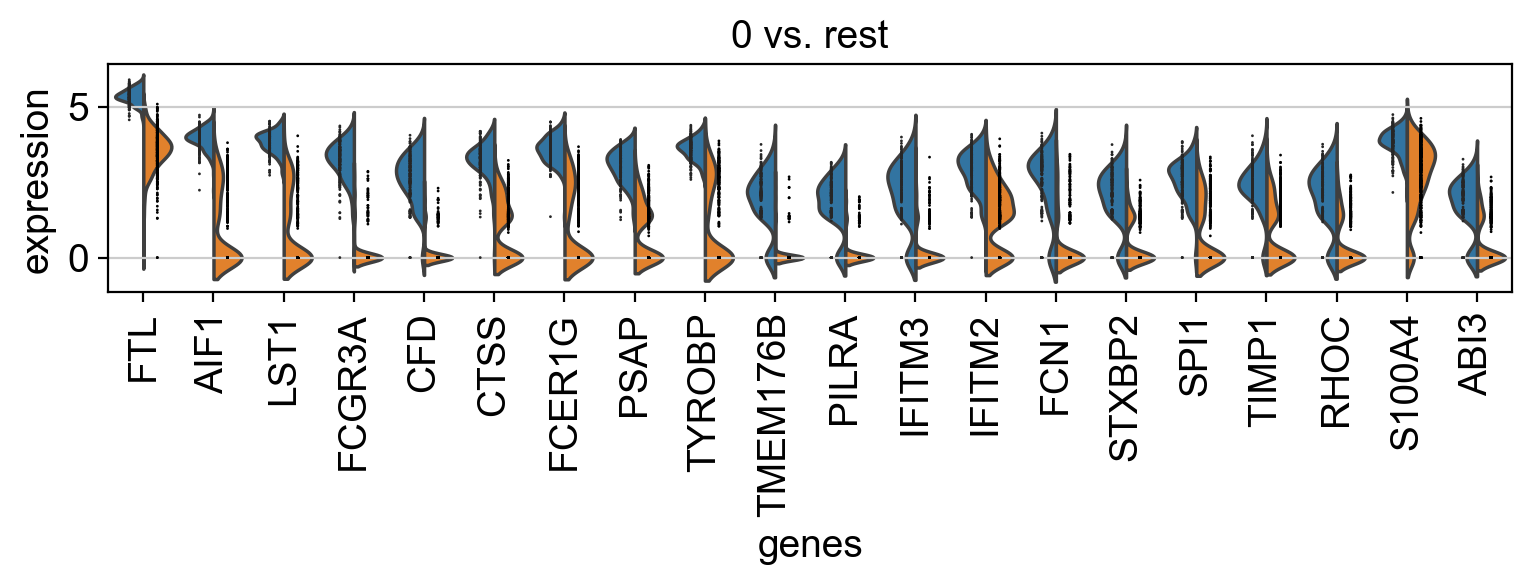

/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


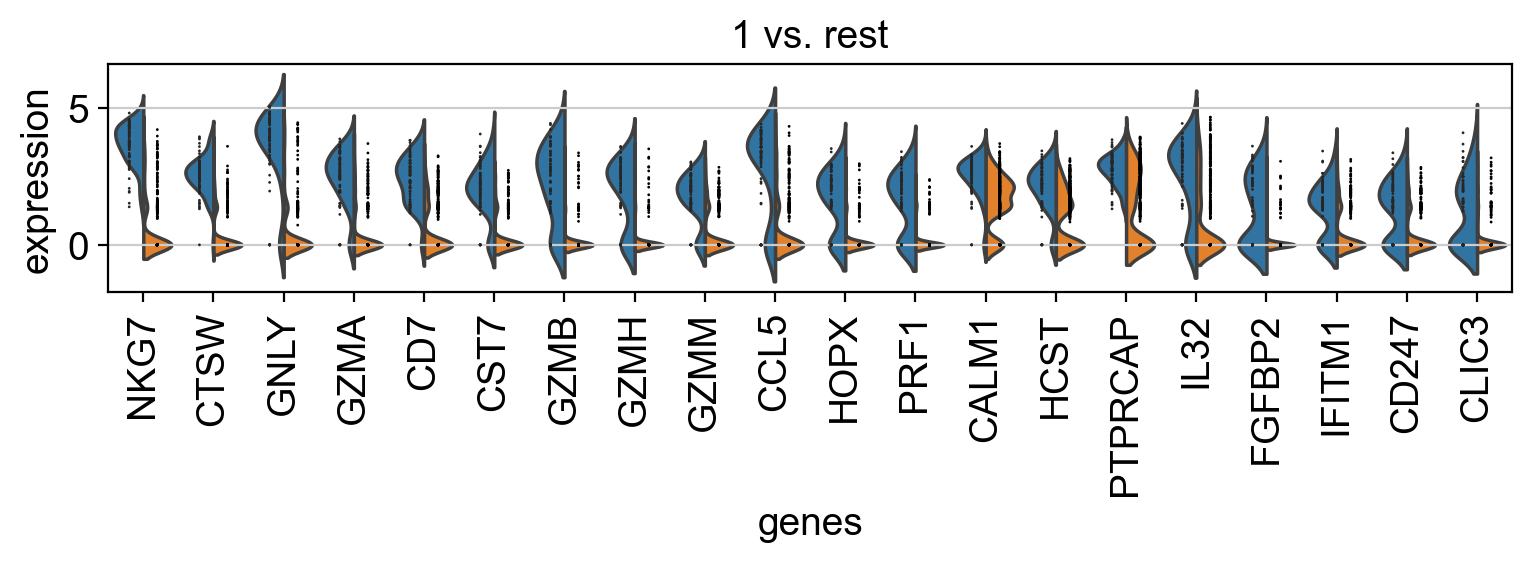

/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


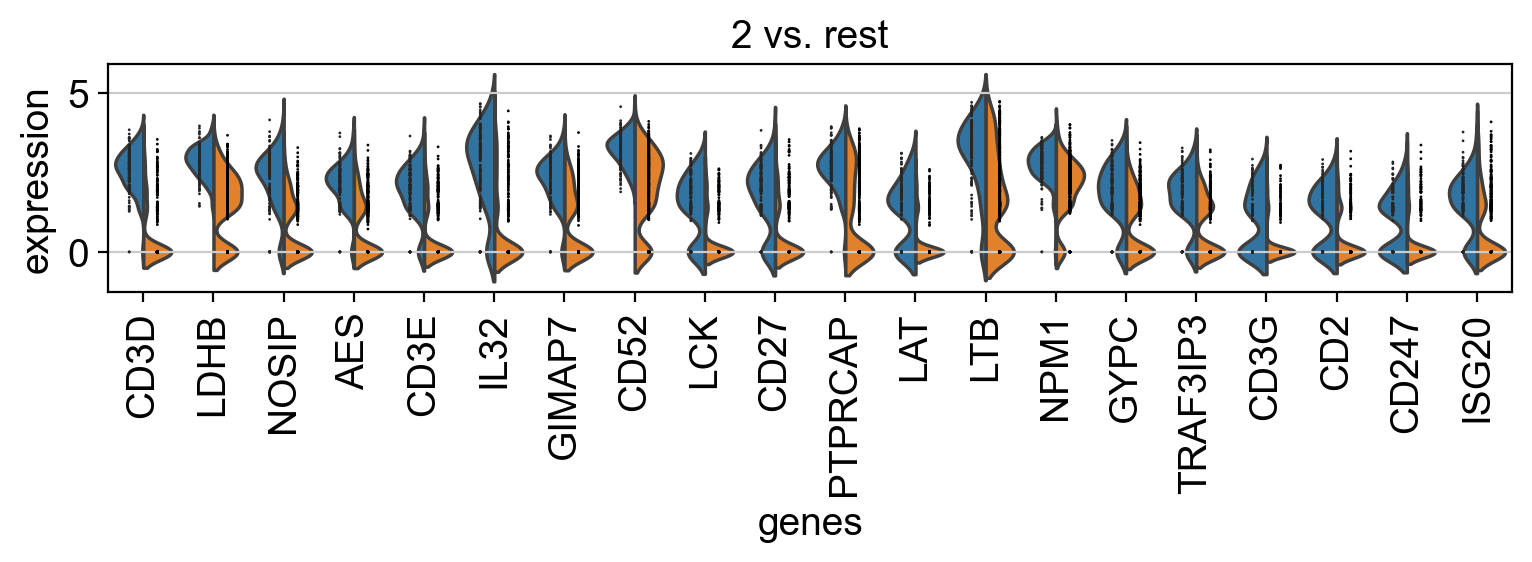

/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


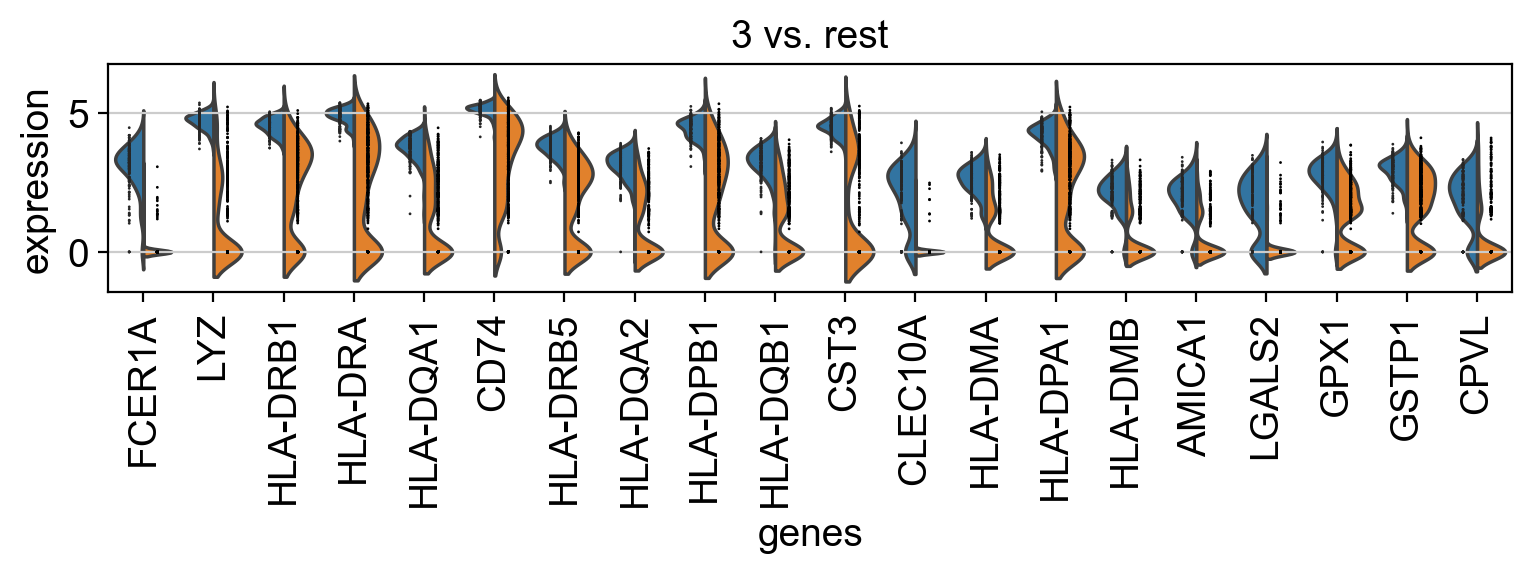

/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


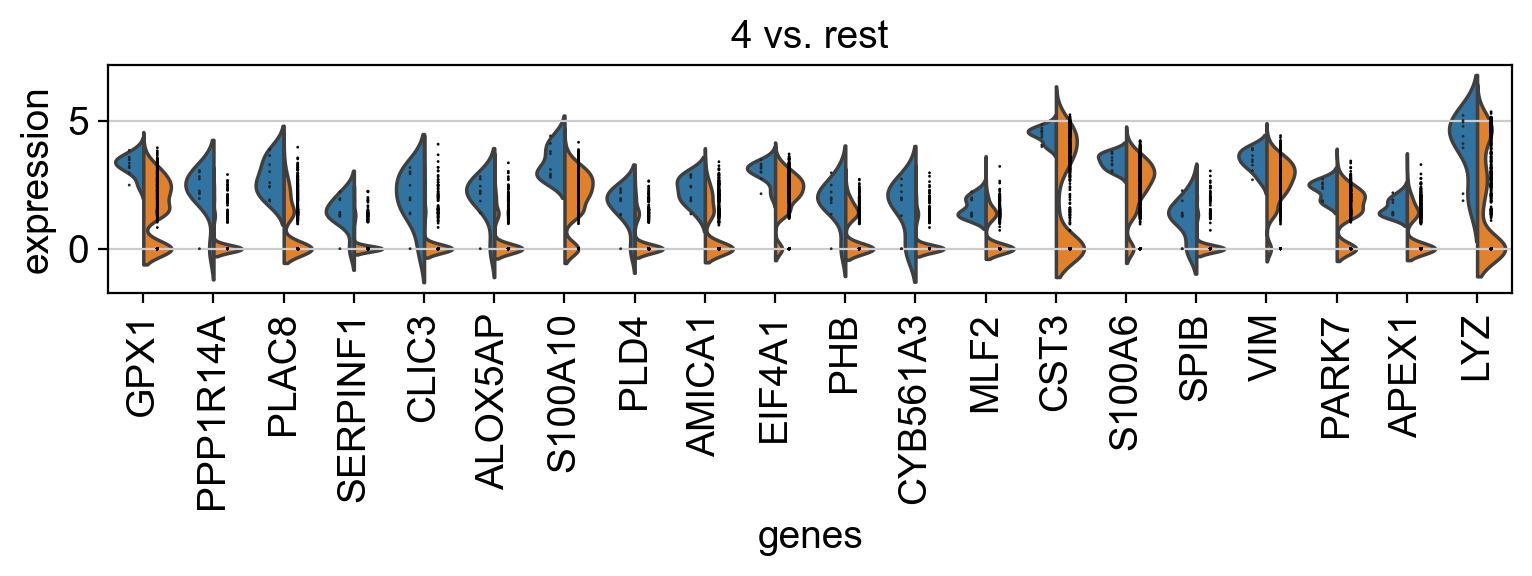

/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


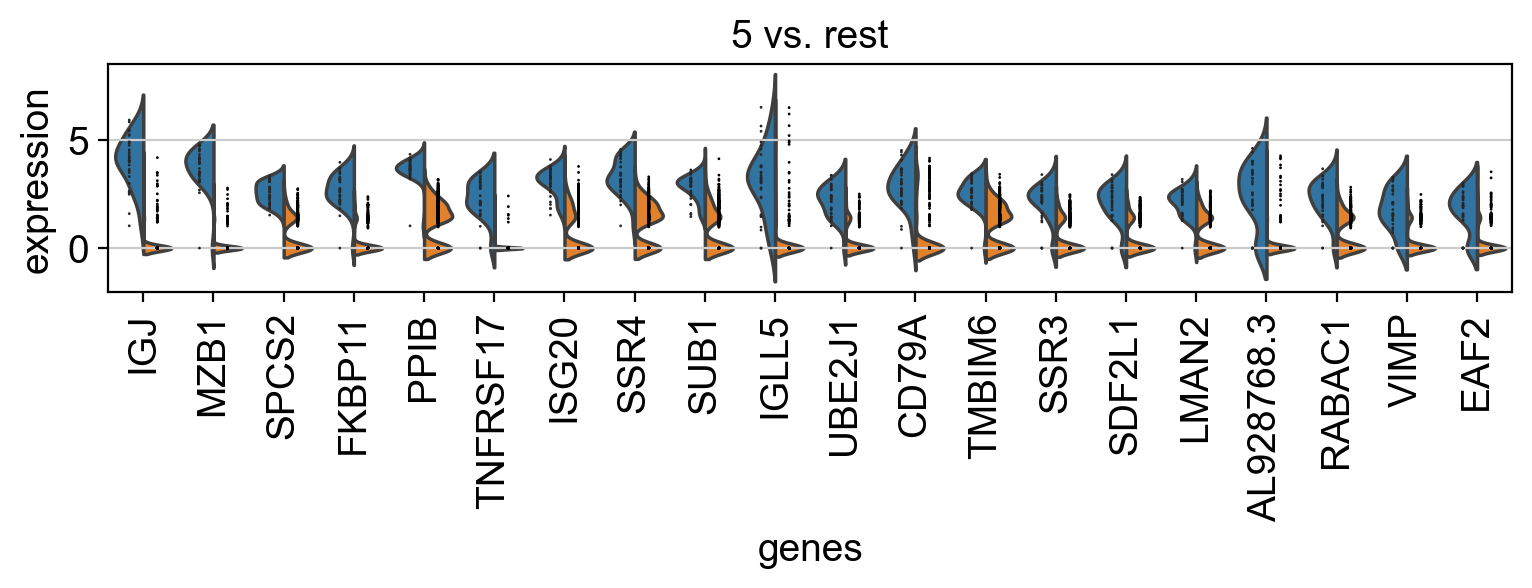

/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


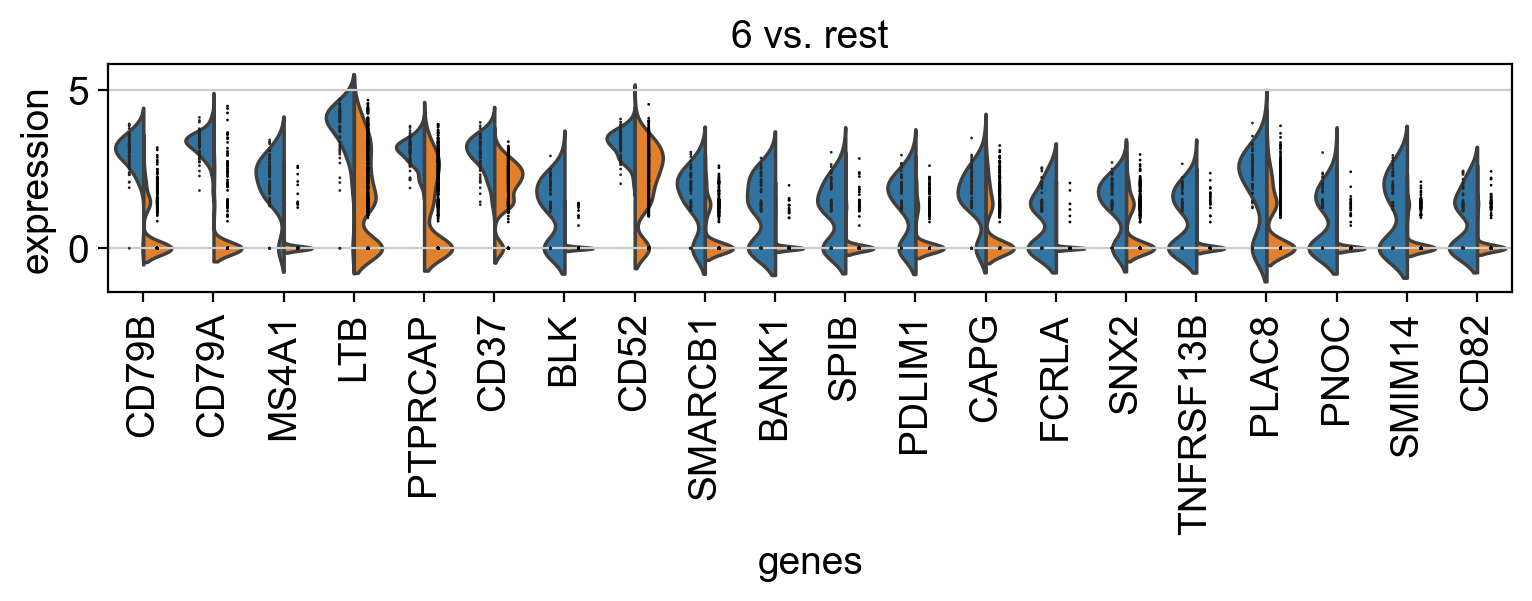

/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


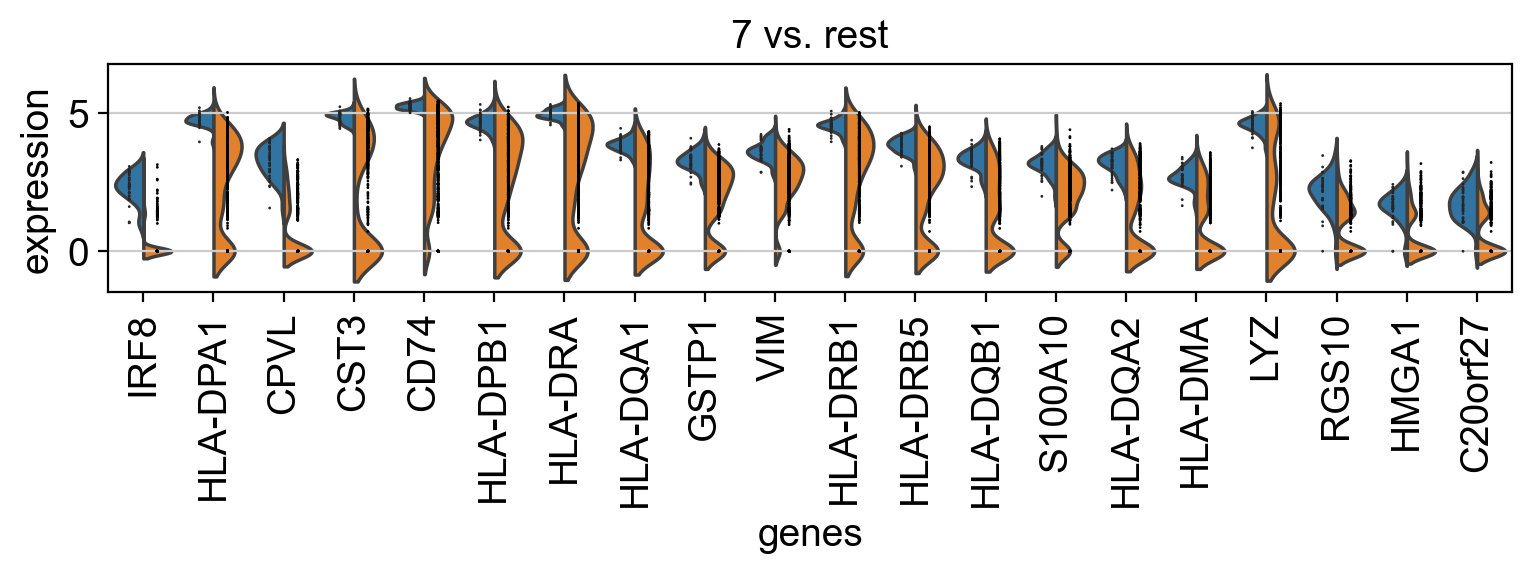

/Users/yanghyejeong/miniforge3/envs/rna_analysis_env/lib/python3.13/site-packages/scanpy/plotting/_tools/__init__.py:1328: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(new_gene_names, rotation="vertical")


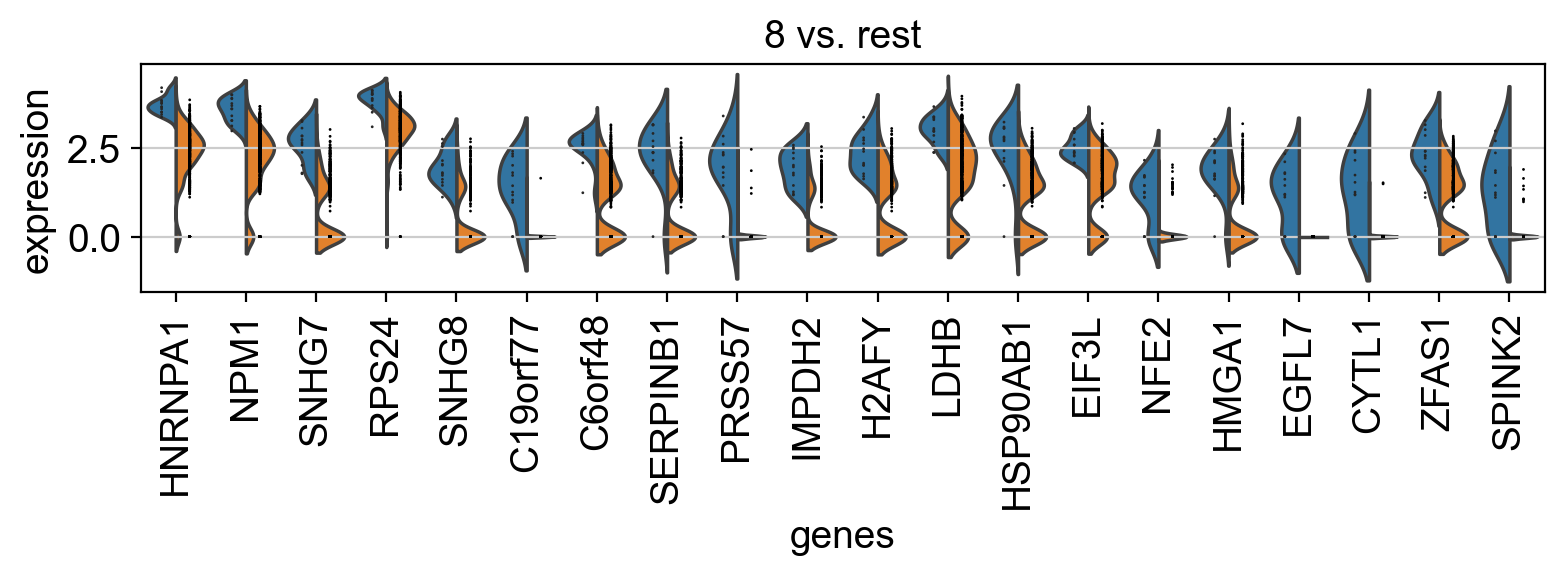

In [38]:
with rc_context({"figure.figsize": (9, 1.5)}):
    sc.pl.rank_genes_groups_violin(
        pbmc,
        n_genes=20,
        jitter=False,
    )

### Dendrogram options

대부분의 시각화는 dendrogram을 사용하여 카테고리를 정렬할 수 있다.

dendrogram은 다음과 같이 독립적으로 플로팅할 수도 있다.

In [39]:
sc.tl.dendrogram(
    pbmc,
    'bulk_labels'
)

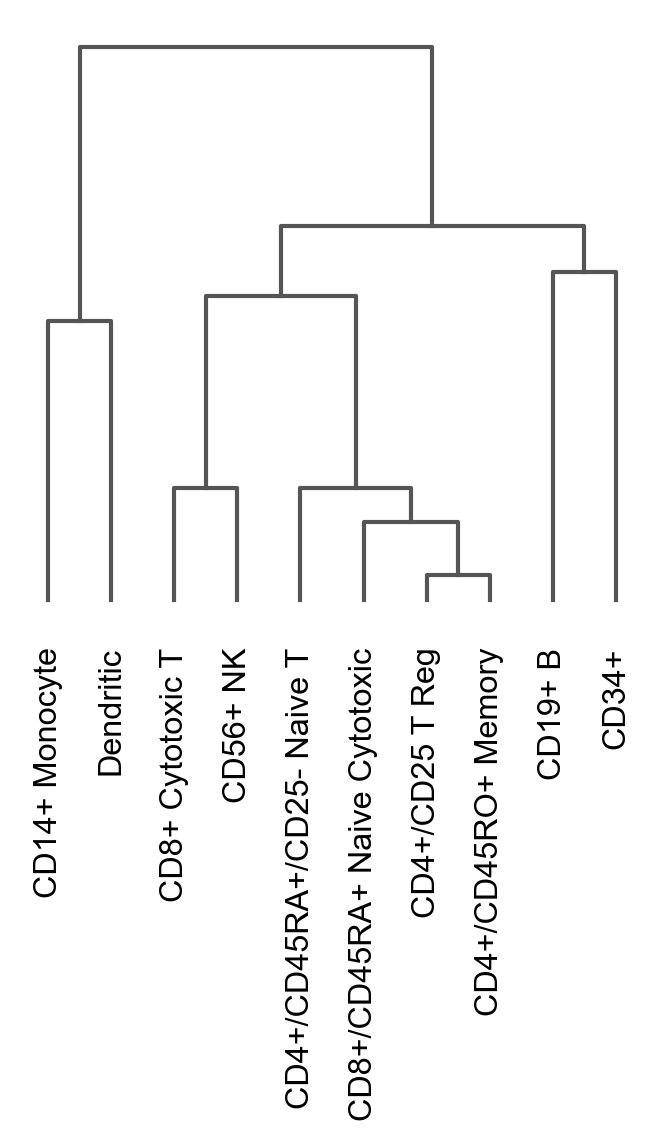

In [40]:
ax = sc.pl.dendrogram(pbmc, groupby='bulk_labels')

### Plot correlation

덴드로그램과 함께 카테고리의 상관관계(기본적으로 'earson')를 그릴 수 있다.

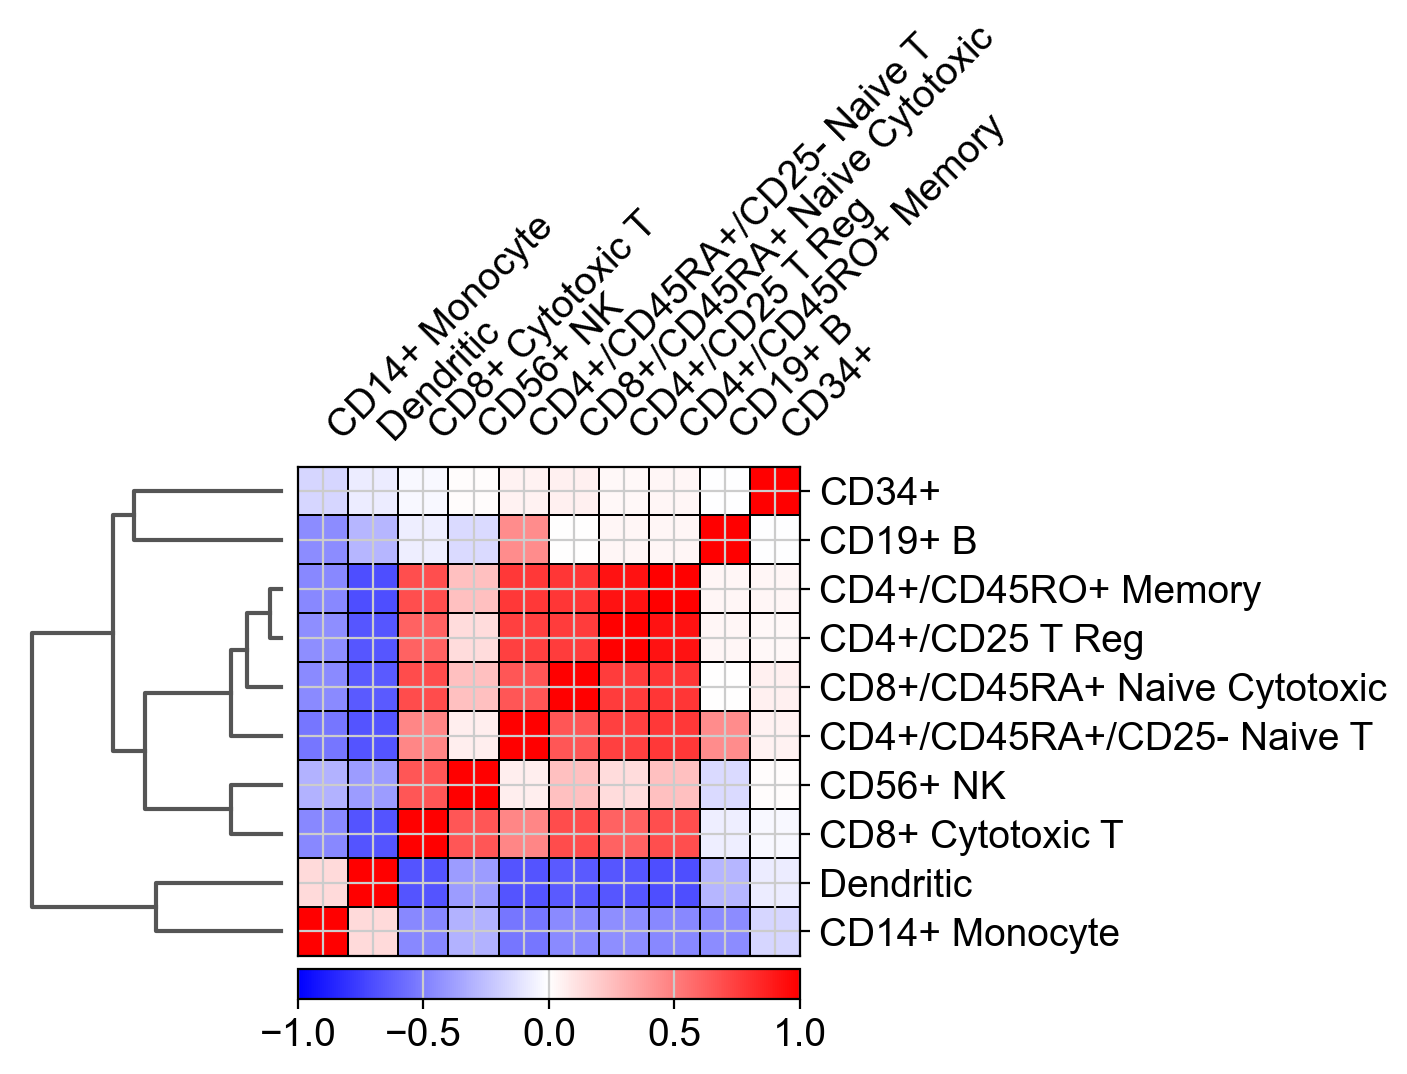

In [41]:
ax = sc.pl.correlation_matrix(
    pbmc,
    'bulk_labels',
    figsize=(5,3.5)
)